In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier, LogisticRegression, PassiveAggressiveClassifier, Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from time import time
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix
import requests
from pprint import pprint
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import itertools

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/intro_final', echo=False, max_overflow=-1)

In [2]:
query = 'select * from clean_tweets'

df = pd.read_sql(query, engine)

df.head()

,text,target
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he cannot update his facebook by...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0


In [3]:
df.dropna(inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


,text,target
0,awww that is bummer you shoulda got david carr...,0
1,is upset that he cannot update his facebook by...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it is not behaving at all mad why am here b...,0
5,not the whole crew,0
6,need hug,0
7,hey long time no see yes rains bit only bit lo...,0
8,nope they did not have it,0
9,que me muera,0


In [3]:
query = 'select * from tweets_700'

df_700 = pd.read_sql(query, engine)

df_700.head()

,text,target
0,"""@zerohedge\n\n#iPhoneXS/#iPhoneXSMax PREORDER...",0
1,A 6.1 inch 720p display in 2018? And they tell...,0
2,Apple has 'defied gravity' with the iPhone for...,1
3,Apple is about to change its business model......,0
4,Despite the ability to perform 5 trillion oper...,0


In [5]:
df_700.dropna(inplace=True)
df_700.info()
df_700

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 710
Data columns (total 2 columns):
text      711 non-null object
target    711 non-null int64
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


,text,target
0,"""@zerohedge\n\n#iPhoneXS/#iPhoneXSMax PREORDER...",0
1,A 6.1 inch 720p display in 2018? And they tell...,0
2,Apple has 'defied gravity' with the iPhone for...,1
3,Apple is about to change its business model......,0
4,Despite the ability to perform 5 trillion oper...,0
5,"""I had too..."" ??\n\n#iPhoneXS #RIPHomeButton ...",0
6,iPhone XS camera reviews unfairly pit it again...,0
7,"""Most advanced #iPhoneXS ever."" is euphemism f...",0
8,"""My great-granddaughter said""... -- excuse me ...",0
9,"""One-third of combined sales of #iPhoneXS and ...",1


<H1> We are adding an additional function to fix sentence grammar since most of the misclassified tweets were not grammatically correct</H1>

In [6]:
token = WordPunctTokenizer()

pattern1 = r'@[A-Za-z0-9_]+'
pattern2 = r'https?://[^ ]+'
combined_pattern = r'|'.join((pattern1, pattern2))
url_pattern = r'www.[^ ]+'
negations_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dict.keys()) + r')\b')
#URL = 'https://services.gingersoftware.com/Ginger/correct/jsonSecured/GingerTheTextFull'
#API_KEY = '6ae0c3a0-afdc-4532-a810-82ded0054236'

def format_tweets(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    clean_tweet_texts = []
    try:
        bom_removed = souped.encode('sloppy-cp1252').decode('utf8').encode('sloppy-cp1252').decode('utf8').replace(u"\x1a", "?")
    except:
        bom_removed = souped
    strip = re.sub(combined_pattern, '', bom_removed)
    strip = re.sub(url_pattern, '', strip)
    convert_lower_case = strip.lower()
    neg_handled = neg_pattern.sub(lambda i: negations_dict[i.group()], convert_lower_case)
    only_letters = re.sub("[^a-zA-Z]", " ", neg_handled)
    final_words = [i for i  in token.tokenize(only_letters) if len(i) > 1]
    text = (" ".join(final_words)).strip()
    return text

In [7]:
%time
print("Processing tweets\n")
clean_tweet_texts = []
for i in tqdm(range(len(df_700))):
    clean_tweet_texts.append(format_tweets(df_700['text'][i]))

Wall time: 0 ns
Processing tweets



100%|██████████████████████████████████████████████████████████████████████████████| 711/711 [00:00<00:00, 3418.26it/s]


In [9]:
clean_tweet_texts[:10], len(clean_tweet_texts)

(['iphonexs iphonexsmax preorders weaker than iphone rosenblatt says',
  'inch display in and they tell you that it is the most advanced lcd in the world and yall believ',
  'apple has defied gravity with the iphone for last years fmr head of retail now ceo ron johnson',
  'apple is about to change its business model and it going to affect the upgrade cycle revenue and services apple upcoming streaming service is reportedly so bland staff are calling it expensive nbc',
  'despite the ability to perform trillion operations second the iphone still can do something your dedicated fall of apple has started',
  'had too iphonexs riphomebutton',
  'iphone xs camera reviews unfairly pit it against year old pixel pixel is still winning',
  'most advanced iphonexs ever is euphemism for we are dragging technologically behind dual sim qi charging',
  'my great granddaughter said excuse me madam sorry our system is down fcuk your phone fcukyourphone apple ios android samsung google galaxys galaxyn

In [8]:
df_700_final = pd.DataFrame(clean_tweet_texts,columns=['text'])
df_700_final['target'] = df_700.target
df_700_final.head(), df_700_final.shape

(                                                text  target
 0  iphonexs iphonexsmax preorders weaker than iph...       0
 1  inch display in and they tell you that it is t...       0
 2  apple has defied gravity with the iphone for l...       1
 3  apple is about to change its business model an...       0
 4  despite the ability to perform trillion operat...       0, (711, 2))

In [10]:
x = df['text']
y = df['target']
x_700 = df_700_final['text']
y_700 = df_700_final['target']

In [11]:
SEED = 2000
x_train_700, x_validation_and_test_700, y_train_700, y_validation_and_test_700 = train_test_split(x_700, y_700, test_size=.5, random_state=SEED)
x_validation_700, x_test_700, y_validation_700, y_test_700 = train_test_split(x_validation_and_test_700, y_validation_and_test_700, test_size=.5, random_state=SEED)

In [12]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [13]:
x_train = pd.concat([x_train, x_train_700])
x_valid = pd.concat([x_validation, x_validation_700])
x_test = pd.concat([x_test, x_test_700])
y_train = pd.concat([y_train, y_train_700])
y_valid = pd.concat([y_validation, y_validation_700])
y_test = pd.concat([y_test, y_test_700])

In [14]:
print(x_train.shape, x_validation.shape, x_test.shape)

(1564475,) (15960,) (16139,)


<h1>Logistic regression seems to be the best model with default parameters. We will try logistic regression with some parameter tuning</h1>

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 79.68%
f1-score score: 80.32%
train and test time: 93.30s
--------------------------------------------------------------------------------
Validation result for 20000 features
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 79.95%
f1-score score: 80.53%
train and test time: 101.21s
--------------------------------------------------------------------------------
Validation result for 30000 features
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 79.84%
f1-score score: 80.43%
train and test time: 101.35s
--------------------------------------------------------------------------------
Validation result for 40000 features
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 79.91%
f1-score score: 80.50%
train and test time: 125.60s
--------------------------------------------------------------------------------
Validation result for 5000

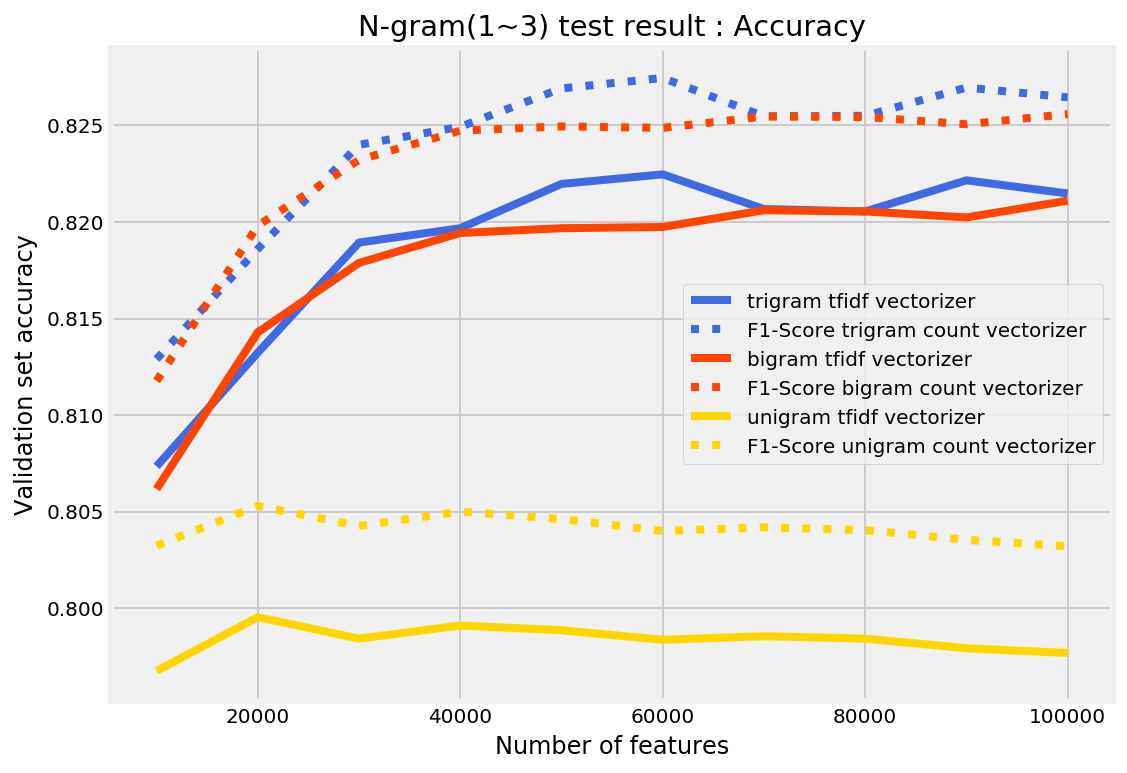

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def accuracy_summary(pipeline, x_train, y_train, x_valid, y_valid):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_valid)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_valid, y_pred)
    print(type(y_valid))
    print(type(y_pred))
    f1_scores = f1_score(y_valid, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("f1-score score: {0:.2f}%".format(f1_scores*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, f1_scores, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression(C=10, class_weight="balanced")
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,nfeature_f1score,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_valid, y_valid)
        result.append((n,nfeature_accuracy,nfeature_f1score,tt_time))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(sublinear_tf=True)

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','f1_score','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','f1_score','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','f1_score','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.f1_score,label='F1-Score trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.f1_score,label='F1-Score bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.f1_score, label='F1-Score unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()


In [88]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [89]:
names = ["Logistic Regression"]
classifiers = [LogisticRegression()]
zipped_clf = zip(names,classifiers)


In [90]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [66]:
y_test_iphone = np.array(y_test_700).tolist() + np.array(y_validation_700).tolist()
x_test_iphone = np.array(x_test_700).tolist() + np.array(x_validation_700).tolist()

In [114]:
vectorizer = TfidfVectorizer()
clf = LogisticRegression()
vectorizer.set_params(stop_words=None, max_features=10000, ngram_range=(1, 1))
pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', clf)
        ])
clf = pipeline.fit(x_train, y_train)
y_pred = clf.predict(x_test_700)
accuracy = accuracy_score(y_test_700, y_pred)
print('Final model accuracy on iPhone data ' + str(accuracy))

Final model accuracy on iPhone data 0.8426966292134831


In [124]:
y_pred = clf.predict(x_validation_700)
np.array(y_pred[0]),y_validation_700[0]

(array(1, dtype=int64), 0)

In [127]:
counter = 0
y_pred = clf.predict(x_validation_700)
for i in range(len(np.array(x_validation_700))):
    if np.array(y_validation_700)[i] != y_pred[i]:
        counter+=1
print('The model has misclassified {} tweets out of {} tweets from validation set and final model accuracy is {}'.format(counter, len(y_test_iphone), 1-counter/len(y_test_iphone)))

The model has misclassified 46 tweets out of 356 tweets from validation set and final model accuracy is 0.8707865168539326


In [129]:
counter = 0
y_pred = clf.predict(x_test_700)
for i in range(len(np.array(x_test_700))):
    if np.array(y_test_700)[i] != y_pred[i]:
        counter+=1
print('The model has misclassified {} tweets out of {} tweets from test set and final model accuracy is {}'.format(counter, len(y_test_iphone), 1-counter/len(y_test_iphone)))

The model has misclassified 28 tweets out of 356 tweets from test set and final model accuracy is 0.9213483146067416


In [130]:
counter = 0
y_pred = clf.predict(x_train_700)
for i in range(len(np.array(x_train_700))):
    if np.array(y_train_700)[i] != y_pred[i]:
        counter+=1
print('The model has misclassified {} tweets out of {} tweets from train set and final model accuracy is {}'.format(counter, len(y_test_iphone), 1-counter/len(y_test_iphone)))

The model has misclassified 77 tweets out of 356 tweets from train set and final model accuracy is 0.7837078651685393


In [63]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

Confusion matrix, without normalization
[[ 38  18]
 [ 10 112]]
Normalized confusion matrix
[[0.68 0.32]
 [0.08 0.92]]


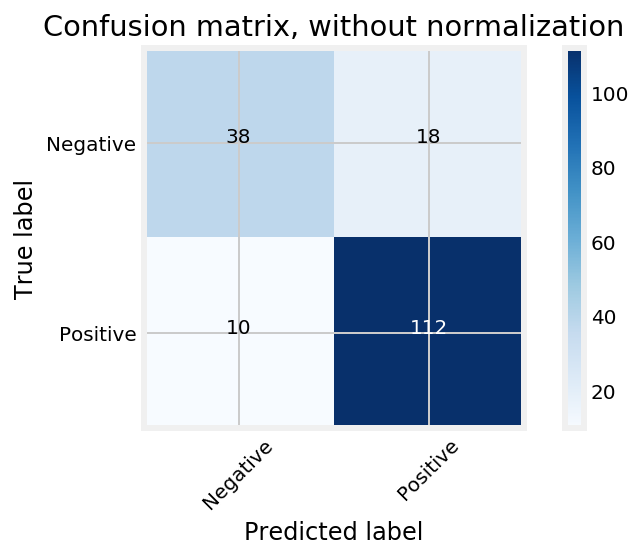

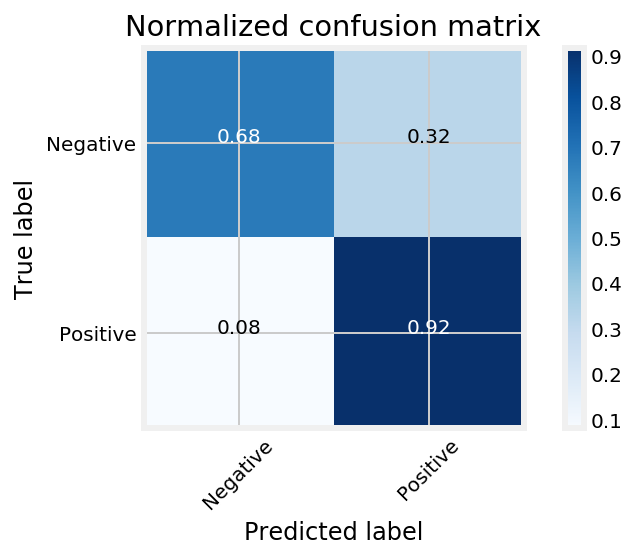

In [104]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(np.array(y_test_700), y_pred)
np.set_printoptions(precision=2)

class_names = ['Negative', 'Positive']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(np.array(y_test_700), y_pred)

0.8426966292134831

<H1>The following are some misclassified tweets. Our classifier did good for most part and most of the misclassified tweets are just grammatically wrong or do not make sense. Let us try a neural network and see if we find any possible way to improve the model</H1>

In [112]:
for i in range(len(np.array(y_test_700))):
    if y_test_iphone[i] != y_pred[i]:
        print(x_test_iphone[i])

dear everyone the larger screens on the iphonexsmax iphonexs and even the iphonexr has turned everything from the iphone plus and below into relic the difference is that apparent avoid looking at the new models if you do not want to upgrade
do not care how good the new iphonexs is quid month is ridiculous
this iphone is very innovative complete easier solutions for taday privacy issues iphonexs iphone
apple iphonex bursts into flames while updating to ios company responds iphonexsmax iphonexr iphonexs appleiphoneservicecenter apple
am blown away by the iphone xs honestly didn expect to be iphonexs
had too iphonexs riphomebutton
am not endorsing apple per se but this image of the curved screen marbled color eye is just fantastic
first thoughts of iphone xs why couldn they do matt glass that was durable and scratch resistant iphonexs
hey you are worth trillion dollars the least you could do is put fast charger in the box smh iphonexs
just got my iphone xs and loving it didn realize how s

<h1>The fine tuned logistic regression model gives close to 80% test accuracy on our iPhone dataset. Let us try pushing it further using some deep learning</h1>

In [15]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tqdm import tqdm
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result


In [16]:
all_x = pd.concat([x_train,x_valid,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

<h1>Here we will be using word2vec embedding. This is a 2 layer neural network that converts text to numbers for the final neural network to understand</h1><br>
<img src='models.png'></img>
Word2vec can utilize either of two model architectures to produce a distributed representation of words: continuous bag-of-words (CBOW) or continuous skip-gram. In the continuous bag-of-words architecture, the model predicts the current word from a window of surrounding context words. The order of context words does not influence prediction (bag-of-words assumption). In the continuous skip-gram architecture, the model uses the current word to predict the surrounding window of context words. The skip-gram architecture weighs nearby context words more heavily than more distant context words. According to the authors' note, CBOW is faster while skip-gram is slower but does a better job for infrequent words.



In [18]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|███████████████████████████████████████████████████████████████████| 1596752/1596752 [00:00<00:00, 2391978.85it/s]


In [19]:
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|███████████████████████████████████████████████████████████████████| 1596752/1596752 [00:00<00:00, 2467978.09it/s]


In [24]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('CNN/w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load('CNN/w2v_model_ug_sg.word2vec')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [25]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Found %s word vectors.' % len(embeddings_index))

Found 106310 word vectors.


In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [17]:
import pickle
with open('CNN/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

with open('CNN/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

sequences = tokenizer.texts_to_sequences(x_test)

Using TensorFlow backend.


In [18]:
#Prints first 3 tweets
for x in x_train[:3]:
    print(x)

your not pregnant oh no what shame
cleaning the bathroom
feeling left out you never recommend anything to me


In [19]:
#Prints embeddings for above tweets
sequences[:3]

[[39, 8, 3329, 75, 34, 45, 775],
 [697, 2, 2078],
 [179, 225, 31, 5, 152, 2180, 319, 1, 14]]

In [17]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [18]:
max(length)

47

In [20]:
x_train_seq = pad_sequences(sequences, maxlen=47)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (1564475, 47)


In [20]:
x_train_seq[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,   253,    39,   186,     1,  3338,     5,
            1,     2, 38937,  1730,   217,    90,    55,  3082,     7,
          179,   165],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,    25,   136,     8,   220,     4,  2057,
           11,  1503],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
           56,    91,    62,   

In [21]:
sequences_val = tokenizer.texts_to_sequences(x_valid)
x_val_seq = pad_sequences(sequences_val, maxlen=47)

In [26]:
num_words = 35000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
seed = 7
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import os
import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Flatten, Dense, UpSampling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import concatenate
from numpy import zeros, newaxis
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.regularizers import l2, l1
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, Callback
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, concatenate, Activation, Conv1D, GlobalMaxPooling1D
from keras.models import Model
import warnings

In [56]:
embedding_matrix.shape

(35000, 200)

In [60]:
model_ug_cbow.save('CNN/w2v_model_ug_cbow.word2vec')
model_ug_sg.save('CNN/w2v_model_ug_sg.word2vec')

In [57]:
import os
dir = os.getcwd()

In [61]:
tweet_input = Input(shape=(47,), dtype='int32')

tweet_encoder = Embedding(35000, 200, weights=[embedding_matrix], input_length=47, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=128, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=196, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=256, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(128, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='val_acc', value=0.85, verbose=1):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True


callbacks = [
             TensorBoard(log_dir=dir+'/cnn_model'),
             EarlyStoppingByAccuracy(monitor='val_acc', value=0.85, verbose=1),
            ]



model.fit(x_train_seq, y_train, batch_size=48, epochs=10,
                     validation_data=(x_val_seq, y_valid), verbose=1, shuffle=True,callbacks=callbacks)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 47)           0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 47, 200)      7000000     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_37 (Conv1D)              (None, 46, 128)      51328       embedding_17[0][0]               
__________________________________________________________________________________________________
conv1d_38 (Conv1D)              (None, 45, 196)      117796      embedding_17[0][0]               
__________________________________________________________________________________________________
conv1d_39 

  38112/1564475 [..............................] - ETA: 5:44:56 - loss: 0.7938 - acc: 0.50 - ETA: 1:33:25 - loss: 0.8615 - acc: 0.51 - ETA: 50:54 - loss: 0.8205 - acc: 0.5078 - ETA: 36:50 - loss: 0.7829 - acc: 0.52 - ETA: 31:18 - loss: 0.7713 - acc: 0.52 - ETA: 26:30 - loss: 0.7617 - acc: 0.53 - ETA: 24:07 - loss: 0.7570 - acc: 0.54 - ETA: 21:41 - loss: 0.7474 - acc: 0.55 - ETA: 19:51 - loss: 0.7332 - acc: 0.57 - ETA: 18:31 - loss: 0.7169 - acc: 0.59 - ETA: 17:26 - loss: 0.7032 - acc: 0.60 - ETA: 16:33 - loss: 0.6968 - acc: 0.60 - ETA: 15:48 - loss: 0.6898 - acc: 0.61 - ETA: 15:13 - loss: 0.6805 - acc: 0.62 - ETA: 14:44 - loss: 0.6716 - acc: 0.62 - ETA: 14:18 - loss: 0.6643 - acc: 0.63 - ETA: 14:02 - loss: 0.6581 - acc: 0.64 - ETA: 13:49 - loss: 0.6555 - acc: 0.64 - ETA: 13:30 - loss: 0.6490 - acc: 0.64 - ETA: 13:13 - loss: 0.6437 - acc: 0.64 - ETA: 12:56 - loss: 0.6412 - acc: 0.65 - ETA: 12:42 - loss: 0.6368 - acc: 0.65 - ETA: 12:30 - loss: 0.6336 - acc: 0.65 - ETA: 12:18 - loss: 0.62

 304896/1564475 [====>.........................] - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4406 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4407 - acc: 0.795 - ETA: 7:06 - loss: 0.4406 - acc: 0.795 - ETA: 7:06 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4405 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4406 - acc: 0.795 - ETA: 7:05 - loss: 0.4405 - acc: 0.795 - ETA: 7:05 - loss: 0.4405 - acc: 0.795 - ETA: 7:05 - loss: 0.4405 - ac

 342912/1564475 [=====>........................] - ETA: 6:54 - loss: 0.4375 - acc: 0.797 - ETA: 6:53 - loss: 0.4374 - acc: 0.797 - ETA: 6:53 - loss: 0.4374 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4373 - acc: 0.797 - ETA: 6:53 - loss: 0.4372 - acc: 0.797 - ETA: 6:53 - loss: 0.4372 - acc: 0.797 - ETA: 6:53 - loss: 0.4372 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - acc: 0.797 - ETA: 6:52 - loss: 0.4371 - ac

 380784/1564475 [======>.......................] - ETA: 6:41 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4346 - acc: 0.799 - ETA: 6:40 - loss: 0.4346 - acc: 0.799 - ETA: 6:40 - loss: 0.4346 - acc: 0.799 - ETA: 6:40 - loss: 0.4347 - acc: 0.799 - ETA: 6:40 - loss: 0.4346 - acc: 0.799 - ETA: 6:40 - loss: 0.4346 - acc: 0.799 - ETA: 6:40 - loss: 0.4345 - acc: 0.799 - ETA: 6:40 - loss: 0.4345 - acc: 0.799 - ETA: 6:40 - loss: 0.4345 - acc: 0.799 - ETA: 6:39 - loss: 0.4345 - acc: 0.799 - ETA: 6:39 - loss: 0.4345 - acc: 0.799 - ETA: 6:39 - loss: 0.4344 - acc: 0.799 - ETA: 6:39 - loss: 0.4344 - acc: 0.799 - ETA: 6:39 - loss: 0.4343 - acc: 0.799 - ETA: 6:39 - loss: 0.4344 - acc: 0.799 - ETA: 6:39 - loss: 0.4343 - acc: 0.799 - ETA: 6:39 - loss: 0.4343 - acc: 0.799 - ETA: 6:39 - loss: 0.4343 - ac

 418656/1564475 [=======>......................] - ETA: 6:28 - loss: 0.4324 - acc: 0.800 - ETA: 6:28 - loss: 0.4324 - acc: 0.800 - ETA: 6:28 - loss: 0.4324 - acc: 0.800 - ETA: 6:28 - loss: 0.4323 - acc: 0.800 - ETA: 6:28 - loss: 0.4323 - acc: 0.800 - ETA: 6:28 - loss: 0.4323 - acc: 0.800 - ETA: 6:28 - loss: 0.4323 - acc: 0.800 - ETA: 6:27 - loss: 0.4323 - acc: 0.800 - ETA: 6:27 - loss: 0.4323 - acc: 0.800 - ETA: 6:27 - loss: 0.4323 - acc: 0.800 - ETA: 6:27 - loss: 0.4323 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4321 - acc: 0.800 - ETA: 6:27 - loss: 0.4321 - acc: 0.800 - ETA: 6:27 - loss: 0.4322 - acc: 0.800 - ETA: 6:27 - loss: 0.4321 - acc: 0.800 - ETA: 6:27 - loss: 0.4321 - acc: 0.800 - ETA: 6:26 - loss: 0.4321 - ac

 456912/1564475 [=======>......................] - ETA: 6:15 - loss: 0.4303 - acc: 0.802 - ETA: 6:15 - loss: 0.4303 - acc: 0.802 - ETA: 6:15 - loss: 0.4302 - acc: 0.802 - ETA: 6:15 - loss: 0.4302 - acc: 0.802 - ETA: 6:15 - loss: 0.4301 - acc: 0.802 - ETA: 6:15 - loss: 0.4302 - acc: 0.802 - ETA: 6:15 - loss: 0.4301 - acc: 0.802 - ETA: 6:15 - loss: 0.4301 - acc: 0.802 - ETA: 6:15 - loss: 0.4301 - acc: 0.802 - ETA: 6:15 - loss: 0.4301 - acc: 0.802 - ETA: 6:15 - loss: 0.4300 - acc: 0.802 - ETA: 6:15 - loss: 0.4300 - acc: 0.802 - ETA: 6:15 - loss: 0.4300 - acc: 0.802 - ETA: 6:15 - loss: 0.4299 - acc: 0.802 - ETA: 6:14 - loss: 0.4299 - acc: 0.802 - ETA: 6:14 - loss: 0.4299 - acc: 0.802 - ETA: 6:14 - loss: 0.4299 - acc: 0.802 - ETA: 6:14 - loss: 0.4299 - acc: 0.802 - ETA: 6:14 - loss: 0.4298 - acc: 0.802 - ETA: 6:14 - loss: 0.4298 - acc: 0.802 - ETA: 6:14 - loss: 0.4298 - acc: 0.802 - ETA: 6:14 - loss: 0.4298 - acc: 0.802 - ETA: 6:14 - loss: 0.4298 - acc: 0.802 - ETA: 6:14 - loss: 0.4298 - ac

 494928/1564475 [========>.....................] - ETA: 6:03 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4277 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:02 - loss: 0.4276 - acc: 0.803 - ETA: 6:01 - loss: 0.4276 - acc: 0.803 - ETA: 6:01 - loss: 0.4276 - acc: 0.803 - ETA: 6:01 - loss: 0.4277 - acc: 0.803 - ETA: 6:01 - loss: 0.4277 - acc: 0.803 - ETA: 6:01 - loss: 0.4277 - acc: 0.803 - ETA: 6:01 - loss: 0.4276 - acc: 0.803 - ETA: 6:01 - loss: 0.4276 - acc: 0.803 - ETA: 6:01 - loss: 0.4276 - ac

 533136/1564475 [=========>....................] - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:50 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4261 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - acc: 0.804 - ETA: 5:49 - loss: 0.4260 - ac

 571536/1564475 [=========>....................] - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4245 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:37 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4244 - acc: 0.805 - ETA: 5:36 - loss: 0.4243 - ac

 609840/1564475 [==========>...................] - ETA: 5:25 - loss: 0.4225 - acc: 0.806 - ETA: 5:25 - loss: 0.4225 - acc: 0.806 - ETA: 5:24 - loss: 0.4225 - acc: 0.806 - ETA: 5:24 - loss: 0.4225 - acc: 0.806 - ETA: 5:24 - loss: 0.4225 - acc: 0.806 - ETA: 5:24 - loss: 0.4225 - acc: 0.806 - ETA: 5:24 - loss: 0.4225 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4223 - acc: 0.806 - ETA: 5:24 - loss: 0.4224 - acc: 0.806 - ETA: 5:24 - loss: 0.4223 - acc: 0.806 - ETA: 5:24 - loss: 0.4223 - acc: 0.806 - ETA: 5:24 - loss: 0.4223 - acc: 0.806 - ETA: 5:23 - loss: 0.4223 - acc: 0.806 - ETA: 5:23 - loss: 0.4223 - acc: 0.806 - ETA: 5:23 - loss: 0.4223 - acc: 0.806 - ETA: 5:23 - loss: 0.4223 - acc: 0.806 - ETA: 5:23 - loss: 0.4223 - ac

 647760/1564475 [===========>..................] - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:12 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - acc: 0.807 - ETA: 5:11 - loss: 0.4209 - acc: 0.807 - ETA: 5:11 - loss: 0.4208 - ac

 685488/1564475 [============>.................] - ETA: 5:00 - loss: 0.4196 - acc: 0.808 - ETA: 5:00 - loss: 0.4196 - acc: 0.808 - ETA: 5:00 - loss: 0.4196 - acc: 0.808 - ETA: 5:00 - loss: 0.4196 - acc: 0.808 - ETA: 4:59 - loss: 0.4196 - acc: 0.808 - ETA: 4:59 - loss: 0.4196 - acc: 0.808 - ETA: 4:59 - loss: 0.4196 - acc: 0.808 - ETA: 4:59 - loss: 0.4196 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:59 - loss: 0.4195 - acc: 0.808 - ETA: 4:58 - loss: 0.4195 - acc: 0.808 - ETA: 4:58 - loss: 0.4195 - acc: 0.808 - ETA: 4:58 - loss: 0.4195 - ac

 723456/1564475 [============>.................] - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:47 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - acc: 0.809 - ETA: 4:46 - loss: 0.4182 - acc: 0.809 - ETA: 4:46 - loss: 0.4183 - ac

 761760/1564475 [=============>................] - ETA: 4:35 - loss: 0.4172 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:35 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - acc: 0.809 - ETA: 4:34 - loss: 0.4171 - ac

 800112/1564475 [==============>...............] - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4162 - acc: 0.810 - ETA: 4:22 - loss: 0.4163 - acc: 0.810 - ETA: 4:22 - loss: 0.4162 - acc: 0.810 - ETA: 4:21 - loss: 0.4162 - acc: 0.810 - ETA: 4:21 - loss: 0.4162 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - acc: 0.810 - ETA: 4:21 - loss: 0.4163 - ac

 837936/1564475 [===============>..............] - ETA: 4:10 - loss: 0.4155 - acc: 0.810 - ETA: 4:10 - loss: 0.4154 - acc: 0.810 - ETA: 4:10 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4154 - acc: 0.810 - ETA: 4:09 - loss: 0.4153 - acc: 0.810 - ETA: 4:09 - loss: 0.4153 - acc: 0.810 - ETA: 4:08 - loss: 0.4153 - acc: 0.810 - ETA: 4:08 - loss: 0.4153 - acc: 0.810 - ETA: 4:08 - loss: 0.4153 - acc: 0.810 - ETA: 4:08 - loss: 0.4153 - ac

 876048/1564475 [===============>..............] - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:57 - loss: 0.4145 - acc: 0.811 - ETA: 3:56 - loss: 0.4145 - acc: 0.811 - ETA: 3:56 - loss: 0.4145 - acc: 0.811 - ETA: 3:56 - loss: 0.4145 - acc: 0.811 - ETA: 3:56 - loss: 0.4145 - acc: 0.811 - ETA: 3:56 - loss: 0.4145 - acc: 0.811 - ETA: 3:56 - loss: 0.4144 - acc: 0.811 - ETA: 3:56 - loss: 0.4144 - acc: 0.811 - ETA: 3:56 - loss: 0.4144 - acc: 0.811 - ETA: 3:56 - loss: 0.4144 - acc: 0.811 - ETA: 3:56 - loss: 0.4144 - ac

 914016/1564475 [================>.............] - ETA: 3:45 - loss: 0.4137 - acc: 0.812 - ETA: 3:45 - loss: 0.4136 - acc: 0.812 - ETA: 3:45 - loss: 0.4136 - acc: 0.812 - ETA: 3:45 - loss: 0.4136 - acc: 0.812 - ETA: 3:45 - loss: 0.4136 - acc: 0.812 - ETA: 3:45 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4136 - acc: 0.812 - ETA: 3:44 - loss: 0.4135 - acc: 0.812 - ETA: 3:44 - loss: 0.4135 - acc: 0.812 - ETA: 3:44 - loss: 0.4135 - acc: 0.812 - ETA: 3:43 - loss: 0.4135 - acc: 0.812 - ETA: 3:43 - loss: 0.4135 - ac

 952560/1564475 [=================>............] - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4130 - acc: 0.812 - ETA: 3:32 - loss: 0.4129 - acc: 0.812 - ETA: 3:32 - loss: 0.4129 - acc: 0.812 - ETA: 3:32 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - acc: 0.812 - ETA: 3:31 - loss: 0.4129 - ac

 990624/1564475 [=================>............] - ETA: 3:20 - loss: 0.4122 - acc: 0.812 - ETA: 3:20 - loss: 0.4122 - acc: 0.812 - ETA: 3:20 - loss: 0.4122 - acc: 0.812 - ETA: 3:20 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4122 - acc: 0.812 - ETA: 3:19 - loss: 0.4121 - acc: 0.812 - ETA: 3:18 - loss: 0.4121 - acc: 0.812 - ETA: 3:18 - loss: 0.4121 - acc: 0.812 - ETA: 3:18 - loss: 0.4121 - acc: 0.813 - ETA: 3:18 - loss: 0.4121 - ac

1028544/1564475 [==================>...........] - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:07 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4113 - acc: 0.813 - ETA: 3:06 - loss: 0.4112 - acc: 0.813 - ETA: 3:06 - loss: 0.4112 - acc: 0.813 - ETA: 3:06 - loss: 0.4112 - ac

1066464/1564475 [===================>..........] - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:55 - loss: 0.4108 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:54 - loss: 0.4107 - acc: 0.813 - ETA: 2:53 - loss: 0.4107 - acc: 0.813 - ETA: 2:53 - loss: 0.4107 - ac

1104480/1564475 [====================>.........] - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:42 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - acc: 0.814 - ETA: 2:41 - loss: 0.4100 - ac

1142688/1564475 [====================>.........] - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:30 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4095 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - acc: 0.814 - ETA: 2:29 - loss: 0.4094 - ac

1180848/1564475 [=====================>........] - ETA: 2:17 - loss: 0.4088 - acc: 0.814 - ETA: 2:17 - loss: 0.4088 - acc: 0.814 - ETA: 2:17 - loss: 0.4088 - acc: 0.814 - ETA: 2:17 - loss: 0.4088 - acc: 0.814 - ETA: 2:17 - loss: 0.4088 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:17 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - acc: 0.814 - ETA: 2:16 - loss: 0.4087 - ac

1218960/1564475 [======================>.......] - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:05 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4082 - acc: 0.815 - ETA: 2:04 - loss: 0.4081 - acc: 0.815 - ETA: 2:04 - loss: 0.4081 - acc: 0.815 - ETA: 2:04 - loss: 0.4081 - acc: 0.815 - ETA: 2:04 - loss: 0.4081 - ac

1257072/1564475 [=======================>......] - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4077 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:52 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - acc: 0.815 - ETA: 1:51 - loss: 0.4076 - ac

1295424/1564475 [=======================>......] - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:40 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - acc: 0.815 - ETA: 1:39 - loss: 0.4071 - ac

1333680/1564475 [========================>.....] - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:27 - loss: 0.4065 - acc: 0.816 - ETA: 1:26 - loss: 0.4064 - acc: 0.816 - ETA: 1:26 - loss: 0.4065 - acc: 0.816 - ETA: 1:26 - loss: 0.4065 - acc: 0.816 - ETA: 1:26 - loss: 0.4064 - acc: 0.816 - ETA: 1:26 - loss: 0.4064 - acc: 0.816 - ETA: 1:26 - loss: 0.4065 - acc: 0.816 - ETA: 1:26 - loss: 0.4065 - ac

1371888/1564475 [=========================>....] - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:15 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - acc: 0.816 - ETA: 1:14 - loss: 0.4060 - ac

1411488/1564475 [==========================>...] - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:02 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - acc: 0.816 - ETA: 1:01 - loss: 0.4055 - ac

1452048/1564475 [==========================>...] - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4051 - acc: 0.81 - ETA: 49s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 - ETA: 48s - loss: 0.4050 - acc: 0.81 -

1492704/1564475 [===========================>..] - ETA: 36s - loss: 0.4048 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 36s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 - ETA: 35s - loss: 0.4047 - acc: 0.81 -

1532880/1564475 [============================>.] - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 23s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4044 - acc: 0.81 - ETA: 22s - loss: 0.4043 - acc: 0.81 - ETA: 22s - loss: 0.4043 - acc: 0.81 - ETA: 22s - loss: 0.4043 - acc: 0.81 - ETA: 21s - loss: 0.4043 - acc: 0.81 -

1564475/1564475 [==============================] - ETA: 10s - loss: 0.4040 - acc: 0.81 - ETA: 10s - loss: 0.4039 - acc: 0.81 - ETA: 10s - loss: 0.4039 - acc: 0.81 - ETA: 10s - loss: 0.4039 - acc: 0.81 - ETA: 10s - loss: 0.4039 - acc: 0.81 - ETA: 9s - loss: 0.4039 - acc: 0.8176 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 9s - loss: 0.4039 - acc: 0.817 - ETA: 8s - loss: 0.4039 - acc: 0.817 - ETA: 8s - loss: 0.4039 - acc: 0.817 - ETA: 8s - loss: 0.4039 - acc: 0.817 

  37776/1564475 [..............................] - ETA: 47:15 - loss: 0.5368 - acc: 0.70 - ETA: 16:24 - loss: 0.3565 - acc: 0.82 - ETA: 12:40 - loss: 0.3505 - acc: 0.84 - ETA: 11:21 - loss: 0.3387 - acc: 0.85 - ETA: 10:34 - loss: 0.3469 - acc: 0.85 - ETA: 10:09 - loss: 0.3487 - acc: 0.85 - ETA: 10:01 - loss: 0.3549 - acc: 0.84 - ETA: 9:47 - loss: 0.3534 - acc: 0.8490 - ETA: 9:36 - loss: 0.3497 - acc: 0.850 - ETA: 9:27 - loss: 0.3509 - acc: 0.850 - ETA: 9:18 - loss: 0.3503 - acc: 0.849 - ETA: 9:11 - loss: 0.3469 - acc: 0.851 - ETA: 9:08 - loss: 0.3471 - acc: 0.851 - ETA: 9:07 - loss: 0.3464 - acc: 0.851 - ETA: 9:09 - loss: 0.3477 - acc: 0.849 - ETA: 9:04 - loss: 0.3470 - acc: 0.848 - ETA: 9:01 - loss: 0.3496 - acc: 0.847 - ETA: 8:59 - loss: 0.3514 - acc: 0.846 - ETA: 8:58 - loss: 0.3524 - acc: 0.846 - ETA: 8:56 - loss: 0.3558 - acc: 0.844 - ETA: 8:55 - loss: 0.3540 - acc: 0.846 - ETA: 8:53 - loss: 0.3507 - acc: 0.849 - ETA: 8:51 - loss: 0.3530 - acc: 0.848 - ETA: 8:50 - loss: 0.3562 - a

 306144/1564475 [====>.........................] - ETA: 7:03 - loss: 0.3630 - acc: 0.840 - ETA: 7:03 - loss: 0.3630 - acc: 0.840 - ETA: 7:03 - loss: 0.3631 - acc: 0.840 - ETA: 7:03 - loss: 0.3631 - acc: 0.840 - ETA: 7:03 - loss: 0.3631 - acc: 0.840 - ETA: 7:03 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3631 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:02 - loss: 0.3630 - acc: 0.840 - ETA: 7:01 - loss: 0.3630 - ac

 344400/1564475 [=====>........................] - ETA: 6:51 - loss: 0.3636 - acc: 0.840 - ETA: 6:51 - loss: 0.3636 - acc: 0.840 - ETA: 6:51 - loss: 0.3636 - acc: 0.840 - ETA: 6:51 - loss: 0.3636 - acc: 0.840 - ETA: 6:51 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3637 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:50 - loss: 0.3636 - acc: 0.840 - ETA: 6:49 - loss: 0.3636 - acc: 0.840 - ETA: 6:49 - loss: 0.3636 - acc: 0.840 - ETA: 6:49 - loss: 0.3636 - ac

 382224/1564475 [======>.......................] - ETA: 6:38 - loss: 0.3639 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3639 - acc: 0.840 - ETA: 6:38 - loss: 0.3639 - acc: 0.840 - ETA: 6:38 - loss: 0.3639 - acc: 0.840 - ETA: 6:38 - loss: 0.3639 - acc: 0.840 - ETA: 6:38 - loss: 0.3639 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:38 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3640 - acc: 0.840 - ETA: 6:37 - loss: 0.3641 - acc: 0.840 - ETA: 6:37 - loss: 0.3641 - ac

 420288/1564475 [=======>......................] - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:26 - loss: 0.3644 - acc: 0.839 - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:26 - loss: 0.3643 - acc: 0.840 - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:26 - loss: 0.3644 - acc: 0.839 - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:26 - loss: 0.3643 - acc: 0.840 - ETA: 6:26 - loss: 0.3644 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3644 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3643 - acc: 0.840 - ETA: 6:25 - loss: 0.3644 - acc: 0.840 - ETA: 6:25 - loss: 0.3644 - acc: 0.840 - ETA: 6:25 - loss: 0.3644 - acc: 0.840 - ETA: 6:25 - loss: 0.3644 - ac

 458448/1564475 [=======>......................] - ETA: 6:14 - loss: 0.3643 - acc: 0.840 - ETA: 6:14 - loss: 0.3643 - acc: 0.840 - ETA: 6:14 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3643 - acc: 0.840 - ETA: 6:13 - loss: 0.3643 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:13 - loss: 0.3642 - acc: 0.840 - ETA: 6:12 - loss: 0.3642 - acc: 0.840 - ETA: 6:12 - loss: 0.3642 - acc: 0.840 - ETA: 6:12 - loss: 0.3641 - ac

 496656/1564475 [========>.....................] - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:01 - loss: 0.3642 - acc: 0.839 - ETA: 6:01 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3642 - acc: 0.839 - ETA: 6:00 - loss: 0.3642 - acc: 0.839 - ETA: 6:00 - loss: 0.3642 - acc: 0.839 - ETA: 6:00 - loss: 0.3642 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - acc: 0.839 - ETA: 6:00 - loss: 0.3641 - ac

 534528/1564475 [=========>....................] - ETA: 5:49 - loss: 0.3640 - acc: 0.840 - ETA: 5:49 - loss: 0.3640 - acc: 0.840 - ETA: 5:49 - loss: 0.3640 - acc: 0.840 - ETA: 5:49 - loss: 0.3640 - acc: 0.840 - ETA: 5:49 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:48 - loss: 0.3640 - acc: 0.840 - ETA: 5:47 - loss: 0.3640 - acc: 0.840 - ETA: 5:47 - loss: 0.3640 - acc: 0.840 - ETA: 5:47 - loss: 0.3640 - ac

 573072/1564475 [=========>....................] - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3645 - acc: 0.839 - ETA: 5:36 - loss: 0.3644 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3644 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - acc: 0.839 - ETA: 5:35 - loss: 0.3645 - ac

 611376/1564475 [==========>...................] - ETA: 5:24 - loss: 0.3646 - acc: 0.839 - ETA: 5:24 - loss: 0.3646 - acc: 0.839 - ETA: 5:23 - loss: 0.3646 - acc: 0.839 - ETA: 5:23 - loss: 0.3646 - acc: 0.839 - ETA: 5:23 - loss: 0.3646 - acc: 0.839 - ETA: 5:23 - loss: 0.3646 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:23 - loss: 0.3647 - acc: 0.839 - ETA: 5:22 - loss: 0.3647 - acc: 0.839 - ETA: 5:22 - loss: 0.3647 - acc: 0.839 - ETA: 5:22 - loss: 0.3647 - acc: 0.839 - ETA: 5:22 - loss: 0.3647 - acc: 0.839 - ETA: 5:22 - loss: 0.3647 - acc: 0.839 - ETA: 5:22 - loss: 0.3647 - ac

 649872/1564475 [===========>..................] - ETA: 5:11 - loss: 0.3646 - acc: 0.839 - ETA: 5:11 - loss: 0.3646 - acc: 0.839 - ETA: 5:11 - loss: 0.3646 - acc: 0.839 - ETA: 5:11 - loss: 0.3646 - acc: 0.839 - ETA: 5:11 - loss: 0.3646 - acc: 0.839 - ETA: 5:11 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:10 - loss: 0.3646 - acc: 0.839 - ETA: 5:09 - loss: 0.3646 - acc: 0.839 - ETA: 5:09 - loss: 0.3646 - ac

 688224/1564475 [============>.................] - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:58 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - acc: 0.839 - ETA: 4:57 - loss: 0.3646 - ac

 726480/1564475 [============>.................] - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:45 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3649 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - acc: 0.839 - ETA: 4:44 - loss: 0.3648 - ac

 764736/1564475 [=============>................] - ETA: 4:33 - loss: 0.3650 - acc: 0.839 - ETA: 4:33 - loss: 0.3650 - acc: 0.839 - ETA: 4:33 - loss: 0.3650 - acc: 0.839 - ETA: 4:33 - loss: 0.3650 - acc: 0.839 - ETA: 4:33 - loss: 0.3650 - acc: 0.839 - ETA: 4:33 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:32 - loss: 0.3650 - acc: 0.839 - ETA: 4:31 - loss: 0.3650 - acc: 0.839 - ETA: 4:31 - loss: 0.3650 - ac

 802944/1564475 [==============>...............] - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:20 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - acc: 0.839 - ETA: 4:19 - loss: 0.3650 - ac

 840768/1564475 [===============>..............] - ETA: 4:08 - loss: 0.3650 - acc: 0.839 - ETA: 4:08 - loss: 0.3650 - acc: 0.839 - ETA: 4:08 - loss: 0.3650 - acc: 0.839 - ETA: 4:08 - loss: 0.3650 - acc: 0.839 - ETA: 4:08 - loss: 0.3650 - acc: 0.839 - ETA: 4:08 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:07 - loss: 0.3650 - acc: 0.839 - ETA: 4:06 - loss: 0.3650 - acc: 0.839 - ETA: 4:06 - loss: 0.3650 - ac

 878400/1564475 [===============>..............] - ETA: 3:56 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3651 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3650 - acc: 0.839 - ETA: 3:55 - loss: 0.3651 - acc: 0.839 - ETA: 3:54 - loss: 0.3651 - acc: 0.839 - ETA: 3:54 - loss: 0.3651 - acc: 0.839 - ETA: 3:54 - loss: 0.3651 - acc: 0.839 - ETA: 3:54 - loss: 0.3651 - acc: 0.839 - ETA: 3:54 - loss: 0.3651 - ac

 916560/1564475 [================>.............] - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:43 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - acc: 0.839 - ETA: 3:42 - loss: 0.3651 - ac

 954240/1564475 [=================>............] - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:31 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - acc: 0.839 - ETA: 3:30 - loss: 0.3651 - ac

 992640/1564475 [==================>...........] - ETA: 3:19 - loss: 0.3652 - acc: 0.839 - ETA: 3:19 - loss: 0.3652 - acc: 0.839 - ETA: 3:19 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:18 - loss: 0.3652 - acc: 0.839 - ETA: 3:17 - loss: 0.3652 - acc: 0.839 - ETA: 3:17 - loss: 0.3652 - acc: 0.839 - ETA: 3:17 - loss: 0.3652 - acc: 0.839 - ETA: 3:17 - loss: 0.3652 - ac

1031280/1564475 [==================>...........] - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:06 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - acc: 0.839 - ETA: 3:05 - loss: 0.3651 - ac

1069920/1564475 [===================>..........] - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:53 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - acc: 0.839 - ETA: 2:52 - loss: 0.3651 - ac

1108176/1564475 [====================>.........] - ETA: 2:41 - loss: 0.3651 - acc: 0.839 - ETA: 2:41 - loss: 0.3651 - acc: 0.839 - ETA: 2:41 - loss: 0.3651 - acc: 0.839 - ETA: 2:41 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3651 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:40 - loss: 0.3652 - acc: 0.839 - ETA: 2:39 - loss: 0.3652 - acc: 0.839 - ETA: 2:39 - loss: 0.3652 - acc: 0.839 - ETA: 2:39 - loss: 0.3652 - ac

1146240/1564475 [====================>.........] - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:28 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - acc: 0.839 - ETA: 2:27 - loss: 0.3652 - ac

1184928/1564475 [=====================>........] - ETA: 2:16 - loss: 0.3652 - acc: 0.839 - ETA: 2:16 - loss: 0.3652 - acc: 0.839 - ETA: 2:16 - loss: 0.3652 - acc: 0.839 - ETA: 2:16 - loss: 0.3652 - acc: 0.839 - ETA: 2:16 - loss: 0.3652 - acc: 0.839 - ETA: 2:16 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3652 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:15 - loss: 0.3653 - acc: 0.839 - ETA: 2:14 - loss: 0.3653 - acc: 0.839 - ETA: 2:14 - loss: 0.3653 - ac

1223232/1564475 [======================>.......] - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3651 - acc: 0.839 - ETA: 2:03 - loss: 0.3650 - acc: 0.839 - ETA: 2:03 - loss: 0.3650 - acc: 0.839 - ETA: 2:03 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - acc: 0.839 - ETA: 2:02 - loss: 0.3650 - ac

1261488/1564475 [=======================>......] - ETA: 1:51 - loss: 0.3652 - acc: 0.839 - ETA: 1:51 - loss: 0.3652 - acc: 0.839 - ETA: 1:51 - loss: 0.3652 - acc: 0.839 - ETA: 1:51 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:50 - loss: 0.3652 - acc: 0.839 - ETA: 1:49 - loss: 0.3652 - acc: 0.839 - ETA: 1:49 - loss: 0.3652 - acc: 0.839 - ETA: 1:49 - loss: 0.3652 - acc: 0.839 - ETA: 1:49 - loss: 0.3652 - ac

1299792/1564475 [=======================>......] - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:38 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - acc: 0.839 - ETA: 1:37 - loss: 0.3654 - ac

1338240/1564475 [========================>.....] - ETA: 1:26 - loss: 0.3654 - acc: 0.839 - ETA: 1:26 - loss: 0.3654 - acc: 0.839 - ETA: 1:26 - loss: 0.3654 - acc: 0.839 - ETA: 1:26 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:25 - loss: 0.3654 - acc: 0.839 - ETA: 1:24 - loss: 0.3654 - acc: 0.839 - ETA: 1:24 - loss: 0.3654 - acc: 0.839 - ETA: 1:24 - loss: 0.3654 - ac

1376688/1564475 [=========================>....] - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:13 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3656 - acc: 0.839 - ETA: 1:12 - loss: 0.3656 - acc: 0.839 - ETA: 1:12 - loss: 0.3656 - acc: 0.839 - ETA: 1:12 - loss: 0.3655 - acc: 0.839 - ETA: 1:12 - loss: 0.3656 - acc: 0.839 - ETA: 1:12 - loss: 0.3656 - ac

1416960/1564475 [==========================>...] - ETA: 1:01 - loss: 0.3657 - acc: 0.839 - ETA: 1:01 - loss: 0.3657 - acc: 0.839 - ETA: 1:01 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3657 - acc: 0.839 - ETA: 1:00 - loss: 0.3656 - acc: 0.839 - ETA: 1:00 - loss: 0.3656 - acc: 0.839 - ETA: 1:00 - loss: 0.3656 - acc: 0.839 - ETA: 1:00 - loss: 0.3656 - acc: 0.839 - ETA: 1:00 - loss: 0.3656 - acc: 0.839 - ETA: 59s - loss: 0.3656 - acc: 0.839 - ETA: 59s - loss: 0.3656 - acc: 0.83 - ETA: 59s - loss: 0.3656 - acc: 0.83 - ETA: 59s - loss: 0.3656 - acc: 0.83 - ETA: 59s - loss: 0.3656 - acc: 0.83 

1456896/1564475 [==========================>...] - ETA: 48s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 47s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 - ETA: 46s - loss: 0.3655 - acc: 0.83 -

1497072/1564475 [===========================>..] - ETA: 35s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3656 - acc: 0.83 - ETA: 34s - loss: 0.3656 - acc: 0.83 - ETA: 34s - loss: 0.3656 - acc: 0.83 - ETA: 34s - loss: 0.3656 - acc: 0.83 - ETA: 34s - loss: 0.3656 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 34s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 - ETA: 33s - loss: 0.3655 - acc: 0.83 -

1537776/1564475 [============================>.] - ETA: 21s - loss: 0.3656 - acc: 0.83 - ETA: 21s - loss: 0.3656 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 21s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 - ETA: 20s - loss: 0.3657 - acc: 0.83 -

1564475/1564475 [==============================] - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 8s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 - ETA: 7s - loss: 0.3658 - acc: 0.839 -

  38208/1564475 [..............................] - ETA: 42:55 - loss: 0.3000 - acc: 0.89 - ETA: 15:12 - loss: 0.2838 - acc: 0.87 - ETA: 12:04 - loss: 0.2828 - acc: 0.87 - ETA: 10:51 - loss: 0.3014 - acc: 0.86 - ETA: 10:15 - loss: 0.3082 - acc: 0.86 - ETA: 9:55 - loss: 0.3128 - acc: 0.8681 - ETA: 9:43 - loss: 0.3143 - acc: 0.870 - ETA: 9:32 - loss: 0.3158 - acc: 0.869 - ETA: 9:22 - loss: 0.3189 - acc: 0.865 - ETA: 9:16 - loss: 0.3257 - acc: 0.860 - ETA: 9:08 - loss: 0.3268 - acc: 0.859 - ETA: 9:04 - loss: 0.3259 - acc: 0.859 - ETA: 9:00 - loss: 0.3281 - acc: 0.858 - ETA: 8:57 - loss: 0.3295 - acc: 0.857 - ETA: 8:54 - loss: 0.3313 - acc: 0.854 - ETA: 8:55 - loss: 0.3297 - acc: 0.856 - ETA: 8:53 - loss: 0.3311 - acc: 0.857 - ETA: 8:51 - loss: 0.3268 - acc: 0.860 - ETA: 8:48 - loss: 0.3274 - acc: 0.860 - ETA: 8:47 - loss: 0.3277 - acc: 0.859 - ETA: 8:48 - loss: 0.3264 - acc: 0.859 - ETA: 8:47 - loss: 0.3251 - acc: 0.860 - ETA: 8:47 - loss: 0.3252 - acc: 0.860 - ETA: 8:47 - loss: 0.3244 - a

 306048/1564475 [====>.........................] - ETA: 7:03 - loss: 0.3374 - acc: 0.853 - ETA: 7:03 - loss: 0.3374 - acc: 0.853 - ETA: 7:03 - loss: 0.3373 - acc: 0.853 - ETA: 7:03 - loss: 0.3373 - acc: 0.853 - ETA: 7:03 - loss: 0.3373 - acc: 0.853 - ETA: 7:03 - loss: 0.3373 - acc: 0.853 - ETA: 7:02 - loss: 0.3373 - acc: 0.853 - ETA: 7:02 - loss: 0.3373 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3372 - acc: 0.853 - ETA: 7:02 - loss: 0.3373 - acc: 0.853 - ETA: 7:02 - loss: 0.3373 - acc: 0.853 - ETA: 7:02 - loss: 0.3374 - acc: 0.853 - ETA: 7:02 - loss: 0.3374 - acc: 0.853 - ETA: 7:01 - loss: 0.3374 - acc: 0.853 - ETA: 7:01 - loss: 0.3374 - ac

 344544/1564475 [=====>........................] - ETA: 6:50 - loss: 0.3371 - acc: 0.853 - ETA: 6:50 - loss: 0.3371 - acc: 0.853 - ETA: 6:50 - loss: 0.3371 - acc: 0.853 - ETA: 6:50 - loss: 0.3371 - acc: 0.853 - ETA: 6:50 - loss: 0.3372 - acc: 0.853 - ETA: 6:50 - loss: 0.3372 - acc: 0.853 - ETA: 6:49 - loss: 0.3371 - acc: 0.853 - ETA: 6:49 - loss: 0.3371 - acc: 0.853 - ETA: 6:49 - loss: 0.3372 - acc: 0.853 - ETA: 6:49 - loss: 0.3371 - acc: 0.853 - ETA: 6:49 - loss: 0.3371 - acc: 0.853 - ETA: 6:49 - loss: 0.3371 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3371 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:49 - loss: 0.3370 - acc: 0.853 - ETA: 6:48 - loss: 0.3369 - acc: 0.853 - ETA: 6:48 - loss: 0.3369 - ac

 382704/1564475 [======>.......................] - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3370 - acc: 0.853 - ETA: 6:37 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - acc: 0.853 - ETA: 6:36 - loss: 0.3371 - ac

 420720/1564475 [=======>......................] - ETA: 6:25 - loss: 0.3372 - acc: 0.853 - ETA: 6:25 - loss: 0.3372 - acc: 0.853 - ETA: 6:25 - loss: 0.3373 - acc: 0.853 - ETA: 6:25 - loss: 0.3372 - acc: 0.853 - ETA: 6:25 - loss: 0.3372 - acc: 0.853 - ETA: 6:24 - loss: 0.3372 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3373 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3374 - acc: 0.853 - ETA: 6:24 - loss: 0.3375 - acc: 0.853 - ETA: 6:23 - loss: 0.3375 - acc: 0.853 - ETA: 6:23 - loss: 0.3374 - ac

 458880/1564475 [=======>......................] - ETA: 6:13 - loss: 0.3374 - acc: 0.853 - ETA: 6:12 - loss: 0.3374 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3374 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3373 - acc: 0.853 - ETA: 6:12 - loss: 0.3374 - acc: 0.853 - ETA: 6:11 - loss: 0.3373 - acc: 0.853 - ETA: 6:11 - loss: 0.3373 - acc: 0.853 - ETA: 6:11 - loss: 0.3373 - acc: 0.853 - ETA: 6:11 - loss: 0.3373 - acc: 0.853 - ETA: 6:11 - loss: 0.3373 - acc: 0.853 - ETA: 6:11 - loss: 0.3374 - ac

 497184/1564475 [========>.....................] - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3370 - acc: 0.853 - ETA: 6:00 - loss: 0.3371 - acc: 0.853 - ETA: 6:00 - loss: 0.3371 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - acc: 0.853 - ETA: 5:59 - loss: 0.3370 - ac

 535632/1564475 [=========>....................] - ETA: 5:48 - loss: 0.3372 - acc: 0.853 - ETA: 5:48 - loss: 0.3371 - acc: 0.853 - ETA: 5:48 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3371 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:47 - loss: 0.3372 - acc: 0.853 - ETA: 5:46 - loss: 0.3372 - acc: 0.853 - ETA: 5:46 - loss: 0.3372 - acc: 0.853 - ETA: 5:46 - loss: 0.3372 - acc: 0.853 - ETA: 5:46 - loss: 0.3372 - ac

 573792/1564475 [==========>...................] - ETA: 5:35 - loss: 0.3373 - acc: 0.853 - ETA: 5:35 - loss: 0.3372 - acc: 0.853 - ETA: 5:35 - loss: 0.3372 - acc: 0.853 - ETA: 5:35 - loss: 0.3372 - acc: 0.853 - ETA: 5:35 - loss: 0.3373 - acc: 0.853 - ETA: 5:35 - loss: 0.3373 - acc: 0.853 - ETA: 5:35 - loss: 0.3373 - acc: 0.853 - ETA: 5:35 - loss: 0.3373 - acc: 0.853 - ETA: 5:35 - loss: 0.3373 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - acc: 0.853 - ETA: 5:34 - loss: 0.3372 - ac

 612384/1564475 [==========>...................] - ETA: 5:23 - loss: 0.3373 - acc: 0.853 - ETA: 5:22 - loss: 0.3373 - acc: 0.853 - ETA: 5:22 - loss: 0.3373 - acc: 0.853 - ETA: 5:22 - loss: 0.3373 - acc: 0.853 - ETA: 5:22 - loss: 0.3373 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3374 - acc: 0.853 - ETA: 5:22 - loss: 0.3375 - acc: 0.853 - ETA: 5:22 - loss: 0.3375 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - acc: 0.853 - ETA: 5:21 - loss: 0.3374 - ac

 650496/1564475 [===========>..................] - ETA: 5:10 - loss: 0.3376 - acc: 0.853 - ETA: 5:10 - loss: 0.3376 - acc: 0.853 - ETA: 5:10 - loss: 0.3377 - acc: 0.853 - ETA: 5:10 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:09 - loss: 0.3377 - acc: 0.853 - ETA: 5:08 - loss: 0.3377 - acc: 0.853 - ETA: 5:08 - loss: 0.3377 - acc: 0.853 - ETA: 5:08 - loss: 0.3377 - ac

 688608/1564475 [============>.................] - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:57 - loss: 0.3376 - acc: 0.853 - ETA: 4:57 - loss: 0.3376 - acc: 0.853 - ETA: 4:57 - loss: 0.3376 - acc: 0.853 - ETA: 4:57 - loss: 0.3376 - acc: 0.853 - ETA: 4:57 - loss: 0.3376 - acc: 0.853 - ETA: 4:57 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3376 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - acc: 0.853 - ETA: 4:56 - loss: 0.3377 - ac

 727392/1564475 [============>.................] - ETA: 4:45 - loss: 0.3379 - acc: 0.853 - ETA: 4:45 - loss: 0.3379 - acc: 0.853 - ETA: 4:45 - loss: 0.3379 - acc: 0.853 - ETA: 4:45 - loss: 0.3379 - acc: 0.853 - ETA: 4:45 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3379 - acc: 0.853 - ETA: 4:44 - loss: 0.3380 - acc: 0.853 - ETA: 4:44 - loss: 0.3380 - acc: 0.853 - ETA: 4:44 - loss: 0.3380 - acc: 0.853 - ETA: 4:43 - loss: 0.3380 - acc: 0.853 - ETA: 4:43 - loss: 0.3380 - acc: 0.853 - ETA: 4:43 - loss: 0.3380 - ac

 765504/1564475 [=============>................] - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3380 - acc: 0.853 - ETA: 4:32 - loss: 0.3381 - acc: 0.853 - ETA: 4:32 - loss: 0.3381 - acc: 0.853 - ETA: 4:31 - loss: 0.3381 - acc: 0.853 - ETA: 4:31 - loss: 0.3381 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3381 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - acc: 0.853 - ETA: 4:31 - loss: 0.3380 - ac

 803232/1564475 [==============>...............] - ETA: 4:20 - loss: 0.3382 - acc: 0.853 - ETA: 4:20 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:19 - loss: 0.3382 - acc: 0.853 - ETA: 4:18 - loss: 0.3382 - acc: 0.853 - ETA: 4:18 - loss: 0.3382 - acc: 0.853 - ETA: 4:18 - loss: 0.3382 - acc: 0.853 - ETA: 4:18 - loss: 0.3382 - acc: 0.853 - ETA: 4:18 - loss: 0.3382 - acc: 0.853 - ETA: 4:18 - loss: 0.3382 - ac

 841008/1564475 [===============>..............] - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3383 - acc: 0.853 - ETA: 4:07 - loss: 0.3383 - acc: 0.853 - ETA: 4:07 - loss: 0.3383 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:07 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - acc: 0.853 - ETA: 4:06 - loss: 0.3384 - ac

 878304/1564475 [===============>..............] - ETA: 3:55 - loss: 0.3384 - acc: 0.853 - ETA: 3:55 - loss: 0.3383 - acc: 0.853 - ETA: 3:55 - loss: 0.3384 - acc: 0.853 - ETA: 3:55 - loss: 0.3384 - acc: 0.853 - ETA: 3:55 - loss: 0.3384 - acc: 0.853 - ETA: 3:55 - loss: 0.3384 - acc: 0.853 - ETA: 3:55 - loss: 0.3384 - acc: 0.853 - ETA: 3:55 - loss: 0.3383 - acc: 0.853 - ETA: 3:55 - loss: 0.3383 - acc: 0.853 - ETA: 3:55 - loss: 0.3383 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3383 - acc: 0.853 - ETA: 3:54 - loss: 0.3383 - acc: 0.853 - ETA: 3:54 - loss: 0.3383 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - acc: 0.853 - ETA: 3:54 - loss: 0.3384 - ac

 916224/1564475 [================>.............] - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.853 - ETA: 3:43 - loss: 0.3385 - acc: 0.852 - ETA: 3:42 - loss: 0.3385 - acc: 0.852 - ETA: 3:42 - loss: 0.3385 - acc: 0.852 - ETA: 3:42 - loss: 0.3385 - acc: 0.852 - ETA: 3:42 - loss: 0.3385 - acc: 0.852 - ETA: 3:42 - loss: 0.3385 - acc: 0.853 - ETA: 3:42 - loss: 0.3385 - acc: 0.853 - ETA: 3:42 - loss: 0.3385 - acc: 0.853 - ETA: 3:42 - loss: 0.3384 - acc: 0.853 - ETA: 3:42 - loss: 0.3384 - acc: 0.853 - ETA: 3:42 - loss: 0.3384 - acc: 0.853 - ETA: 3:42 - loss: 0.3384 - acc: 0.853 - ETA: 3:42 - loss: 0.3384 - acc: 0.853 - ETA: 3:42 - loss: 0.3384 - acc: 0.853 - ETA: 3:42 - loss: 0.3385 - acc: 0.853 - ETA: 3:42 - loss: 0.3385 - ac

 953568/1564475 [=================>............] - ETA: 3:31 - loss: 0.3386 - acc: 0.852 - ETA: 3:31 - loss: 0.3386 - acc: 0.852 - ETA: 3:31 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:30 - loss: 0.3386 - acc: 0.852 - ETA: 3:29 - loss: 0.3386 - acc: 0.852 - ETA: 3:29 - loss: 0.3386 - acc: 0.852 - ETA: 3:29 - loss: 0.3386 - acc: 0.852 - ETA: 3:29 - loss: 0.3386 - acc: 0.852 - ETA: 3:29 - loss: 0.3386 - ac

 991728/1564475 [==================>...........] - ETA: 3:19 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3386 - acc: 0.853 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:18 - loss: 0.3387 - acc: 0.852 - ETA: 3:17 - loss: 0.3387 - acc: 0.852 - ETA: 3:17 - loss: 0.3387 - acc: 0.852 - ETA: 3:17 - loss: 0.3387 - acc: 0.852 - ETA: 3:17 - loss: 0.3387 - acc: 0.852 - ETA: 3:17 - loss: 0.3387 - acc: 0.852 - ETA: 3:17 - loss: 0.3387 - ac

1029840/1564475 [==================>...........] - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3390 - acc: 0.852 - ETA: 3:06 - loss: 0.3389 - acc: 0.852 - ETA: 3:06 - loss: 0.3389 - acc: 0.852 - ETA: 3:05 - loss: 0.3389 - acc: 0.852 - ETA: 3:05 - loss: 0.3389 - acc: 0.852 - ETA: 3:05 - loss: 0.3389 - acc: 0.852 - ETA: 3:05 - loss: 0.3389 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - acc: 0.852 - ETA: 3:05 - loss: 0.3390 - ac

1067760/1564475 [===================>..........] - ETA: 2:54 - loss: 0.3391 - acc: 0.852 - ETA: 2:54 - loss: 0.3391 - acc: 0.852 - ETA: 2:54 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:53 - loss: 0.3391 - acc: 0.852 - ETA: 2:52 - loss: 0.3391 - acc: 0.852 - ETA: 2:52 - loss: 0.3391 - acc: 0.852 - ETA: 2:52 - loss: 0.3391 - acc: 0.852 - ETA: 2:52 - loss: 0.3391 - acc: 0.852 - ETA: 2:52 - loss: 0.3391 - ac

1106496/1564475 [====================>.........] - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:41 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - acc: 0.852 - ETA: 2:40 - loss: 0.3392 - ac

1144608/1564475 [====================>.........] - ETA: 2:29 - loss: 0.3394 - acc: 0.852 - ETA: 2:29 - loss: 0.3393 - acc: 0.852 - ETA: 2:29 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3394 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3394 - acc: 0.852 - ETA: 2:28 - loss: 0.3394 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3394 - acc: 0.852 - ETA: 2:28 - loss: 0.3394 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3393 - acc: 0.852 - ETA: 2:28 - loss: 0.3394 - acc: 0.852 - ETA: 2:27 - loss: 0.3394 - acc: 0.852 - ETA: 2:27 - loss: 0.3393 - acc: 0.852 - ETA: 2:27 - loss: 0.3393 - acc: 0.852 - ETA: 2:27 - loss: 0.3393 - acc: 0.852 - ETA: 2:27 - loss: 0.3393 - ac

1182624/1564475 [=====================>........] - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:16 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - acc: 0.852 - ETA: 2:15 - loss: 0.3395 - ac

1220496/1564475 [======================>.......] - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:04 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - acc: 0.852 - ETA: 2:03 - loss: 0.3396 - ac

1258848/1564475 [=======================>......] - ETA: 1:52 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:51 - loss: 0.3397 - acc: 0.852 - ETA: 1:50 - loss: 0.3397 - acc: 0.852 - ETA: 1:50 - loss: 0.3397 - acc: 0.852 - ETA: 1:50 - loss: 0.3397 - acc: 0.852 - ETA: 1:50 - loss: 0.3397 - acc: 0.852 - ETA: 1:50 - loss: 0.3397 - acc: 0.852 - ETA: 1:50 - loss: 0.3397 - ac

1296528/1564475 [=======================>......] - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:39 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - acc: 0.852 - ETA: 1:38 - loss: 0.3399 - ac

1334496/1564475 [========================>.....] - ETA: 1:27 - loss: 0.3400 - acc: 0.852 - ETA: 1:27 - loss: 0.3400 - acc: 0.852 - ETA: 1:27 - loss: 0.3400 - acc: 0.852 - ETA: 1:27 - loss: 0.3400 - acc: 0.852 - ETA: 1:27 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:26 - loss: 0.3400 - acc: 0.852 - ETA: 1:25 - loss: 0.3400 - acc: 0.852 - ETA: 1:25 - loss: 0.3400 - ac

1372896/1564475 [=========================>....] - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:14 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - acc: 0.852 - ETA: 1:13 - loss: 0.3403 - ac

1413072/1564475 [==========================>...] - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:02 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3403 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3403 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:01 - loss: 0.3404 - acc: 0.852 - ETA: 1:00 - loss: 0.3404 - ac

1453440/1564475 [==========================>...] - ETA: 49s - loss: 0.3405 - acc: 0.85 - ETA: 49s - loss: 0.3405 - acc: 0.85 - ETA: 49s - loss: 0.3405 - acc: 0.85 - ETA: 49s - loss: 0.3404 - acc: 0.85 - ETA: 49s - loss: 0.3404 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 48s - loss: 0.3405 - acc: 0.85 - ETA: 47s - loss: 0.3405 - acc: 0.85 - ETA: 47s - loss: 0.3405 - acc: 0.85 - ETA: 47s - loss: 0.3405 - acc: 0.85 - ETA: 47s - loss: 0.3405 - acc: 0.85 -

1493664/1564475 [===========================>..] - ETA: 36s - loss: 0.3408 - acc: 0.85 - ETA: 36s - loss: 0.3408 - acc: 0.85 - ETA: 36s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3407 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 35s - loss: 0.3408 - acc: 0.85 - ETA: 34s - loss: 0.3408 - acc: 0.85 - ETA: 34s - loss: 0.3408 - acc: 0.85 - ETA: 34s - loss: 0.3408 - acc: 0.85 - ETA: 34s - loss: 0.3408 - acc: 0.85 - ETA: 34s - loss: 0.3408 - acc: 0.85 - ETA: 34s - loss: 0.3408 - acc: 0.85 -

1533888/1564475 [============================>.] - ETA: 23s - loss: 0.3408 - acc: 0.85 - ETA: 22s - loss: 0.3408 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3408 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 22s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 - ETA: 21s - loss: 0.3409 - acc: 0.85 -

1564475/1564475 [==============================] - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 9s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 - ETA: 8s - loss: 0.3410 - acc: 0.852 -

  38016/1564475 [..............................] - ETA: 44:32 - loss: 0.3290 - acc: 0.85 - ETA: 15:18 - loss: 0.3498 - acc: 0.85 - ETA: 12:07 - loss: 0.3033 - acc: 0.87 - ETA: 11:04 - loss: 0.2984 - acc: 0.87 - ETA: 10:30 - loss: 0.2948 - acc: 0.87 - ETA: 10:03 - loss: 0.2915 - acc: 0.88 - ETA: 9:48 - loss: 0.2898 - acc: 0.8767 - ETA: 9:40 - loss: 0.2960 - acc: 0.875 - ETA: 9:32 - loss: 0.2912 - acc: 0.877 - ETA: 9:26 - loss: 0.2837 - acc: 0.882 - ETA: 9:18 - loss: 0.2858 - acc: 0.879 - ETA: 9:11 - loss: 0.2915 - acc: 0.875 - ETA: 9:07 - loss: 0.2904 - acc: 0.875 - ETA: 9:02 - loss: 0.2947 - acc: 0.871 - ETA: 9:01 - loss: 0.2922 - acc: 0.872 - ETA: 8:58 - loss: 0.2914 - acc: 0.873 - ETA: 8:56 - loss: 0.2926 - acc: 0.872 - ETA: 8:55 - loss: 0.2939 - acc: 0.870 - ETA: 8:54 - loss: 0.2947 - acc: 0.871 - ETA: 8:53 - loss: 0.2934 - acc: 0.872 - ETA: 8:52 - loss: 0.2946 - acc: 0.872 - ETA: 8:50 - loss: 0.2953 - acc: 0.872 - ETA: 8:51 - loss: 0.2934 - acc: 0.873 - ETA: 8:49 - loss: 0.2904 - a

 306384/1564475 [====>.........................] - ETA: 7:01 - loss: 0.3071 - acc: 0.868 - ETA: 7:01 - loss: 0.3071 - acc: 0.868 - ETA: 7:01 - loss: 0.3071 - acc: 0.868 - ETA: 7:01 - loss: 0.3072 - acc: 0.868 - ETA: 7:01 - loss: 0.3072 - acc: 0.868 - ETA: 7:01 - loss: 0.3072 - acc: 0.868 - ETA: 7:01 - loss: 0.3072 - acc: 0.868 - ETA: 7:01 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3072 - acc: 0.868 - ETA: 7:00 - loss: 0.3072 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3073 - acc: 0.868 - ETA: 7:00 - loss: 0.3072 - acc: 0.868 - ETA: 7:00 - loss: 0.3072 - acc: 0.868 - ETA: 7:00 - loss: 0.3071 - ac

 344352/1564475 [=====>........................] - ETA: 6:49 - loss: 0.3071 - acc: 0.868 - ETA: 6:49 - loss: 0.3071 - acc: 0.868 - ETA: 6:49 - loss: 0.3071 - acc: 0.868 - ETA: 6:49 - loss: 0.3071 - acc: 0.868 - ETA: 6:49 - loss: 0.3071 - acc: 0.868 - ETA: 6:49 - loss: 0.3071 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3071 - acc: 0.868 - ETA: 6:48 - loss: 0.3071 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3071 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:48 - loss: 0.3070 - acc: 0.868 - ETA: 6:47 - loss: 0.3070 - acc: 0.868 - ETA: 6:47 - loss: 0.3070 - ac

 382608/1564475 [======>.......................] - ETA: 6:37 - loss: 0.3076 - acc: 0.868 - ETA: 6:37 - loss: 0.3076 - acc: 0.868 - ETA: 6:37 - loss: 0.3076 - acc: 0.868 - ETA: 6:37 - loss: 0.3076 - acc: 0.868 - ETA: 6:37 - loss: 0.3076 - acc: 0.868 - ETA: 6:37 - loss: 0.3076 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3077 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:36 - loss: 0.3078 - acc: 0.868 - ETA: 6:35 - loss: 0.3078 - acc: 0.868 - ETA: 6:35 - loss: 0.3079 - ac

 420528/1564475 [=======>......................] - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3083 - acc: 0.868 - ETA: 6:24 - loss: 0.3083 - acc: 0.868 - ETA: 6:24 - loss: 0.3083 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:24 - loss: 0.3083 - acc: 0.868 - ETA: 6:24 - loss: 0.3084 - acc: 0.868 - ETA: 6:23 - loss: 0.3084 - acc: 0.868 - ETA: 6:23 - loss: 0.3083 - acc: 0.868 - ETA: 6:23 - loss: 0.3083 - acc: 0.868 - ETA: 6:23 - loss: 0.3083 - acc: 0.868 - ETA: 6:23 - loss: 0.3083 - acc: 0.868 - ETA: 6:23 - loss: 0.3082 - acc: 0.868 - ETA: 6:23 - loss: 0.3082 - acc: 0.868 - ETA: 6:23 - loss: 0.3083 - ac

 458976/1564475 [=======>......................] - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3087 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3086 - acc: 0.868 - ETA: 6:12 - loss: 0.3087 - acc: 0.868 - ETA: 6:12 - loss: 0.3087 - acc: 0.868 - ETA: 6:12 - loss: 0.3087 - acc: 0.868 - ETA: 6:12 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3087 - acc: 0.868 - ETA: 6:11 - loss: 0.3086 - acc: 0.868 - ETA: 6:11 - loss: 0.3086 - ac

 496992/1564475 [========>.....................] - ETA: 6:00 - loss: 0.3090 - acc: 0.867 - ETA: 6:00 - loss: 0.3090 - acc: 0.867 - ETA: 6:00 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3090 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:59 - loss: 0.3089 - acc: 0.867 - ETA: 5:58 - loss: 0.3089 - acc: 0.867 - ETA: 5:58 - loss: 0.3089 - acc: 0.867 - ETA: 5:58 - loss: 0.3089 - ac

 535152/1564475 [=========>....................] - ETA: 5:47 - loss: 0.3087 - acc: 0.868 - ETA: 5:47 - loss: 0.3087 - acc: 0.868 - ETA: 5:47 - loss: 0.3087 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:47 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - acc: 0.868 - ETA: 5:46 - loss: 0.3088 - ac

 573504/1564475 [=========>....................] - ETA: 5:35 - loss: 0.3093 - acc: 0.867 - ETA: 5:35 - loss: 0.3093 - acc: 0.867 - ETA: 5:35 - loss: 0.3094 - acc: 0.867 - ETA: 5:35 - loss: 0.3094 - acc: 0.867 - ETA: 5:35 - loss: 0.3094 - acc: 0.867 - ETA: 5:35 - loss: 0.3094 - acc: 0.867 - ETA: 5:35 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:34 - loss: 0.3094 - acc: 0.867 - ETA: 5:33 - loss: 0.3094 - ac

 611328/1564475 [==========>...................] - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3100 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:22 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - acc: 0.867 - ETA: 5:21 - loss: 0.3099 - ac

 649152/1564475 [===========>..................] - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:10 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3105 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - acc: 0.867 - ETA: 5:09 - loss: 0.3104 - ac

 687216/1564475 [============>.................] - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:58 - loss: 0.3106 - acc: 0.867 - ETA: 4:57 - loss: 0.3106 - acc: 0.867 - ETA: 4:57 - loss: 0.3106 - acc: 0.867 - ETA: 4:57 - loss: 0.3106 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:57 - loss: 0.3107 - acc: 0.867 - ETA: 4:56 - loss: 0.3107 - acc: 0.867 - ETA: 4:56 - loss: 0.3107 - ac

 725088/1564475 [============>.................] - ETA: 4:46 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:45 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - acc: 0.867 - ETA: 4:44 - loss: 0.3109 - ac

 763248/1564475 [=============>................] - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:33 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - acc: 0.867 - ETA: 4:32 - loss: 0.3110 - ac

 801552/1564475 [==============>...............] - ETA: 4:21 - loss: 0.3113 - acc: 0.866 - ETA: 4:21 - loss: 0.3113 - acc: 0.866 - ETA: 4:21 - loss: 0.3113 - acc: 0.866 - ETA: 4:21 - loss: 0.3113 - acc: 0.866 - ETA: 4:21 - loss: 0.3113 - acc: 0.866 - ETA: 4:21 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:20 - loss: 0.3113 - acc: 0.866 - ETA: 4:19 - loss: 0.3113 - acc: 0.866 - ETA: 4:19 - loss: 0.3113 - ac

 839520/1564475 [===============>..............] - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3117 - acc: 0.866 - ETA: 4:08 - loss: 0.3116 - acc: 0.866 - ETA: 4:08 - loss: 0.3117 - acc: 0.866 - ETA: 4:08 - loss: 0.3117 - acc: 0.866 - ETA: 4:08 - loss: 0.3117 - acc: 0.866 - ETA: 4:08 - loss: 0.3117 - acc: 0.866 - ETA: 4:08 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3116 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - acc: 0.866 - ETA: 4:07 - loss: 0.3117 - ac

 877440/1564475 [===============>..............] - ETA: 3:56 - loss: 0.3118 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:56 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - acc: 0.866 - ETA: 3:55 - loss: 0.3119 - ac

 915648/1564475 [================>.............] - ETA: 3:44 - loss: 0.3121 - acc: 0.866 - ETA: 3:44 - loss: 0.3121 - acc: 0.866 - ETA: 3:44 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:43 - loss: 0.3121 - acc: 0.866 - ETA: 3:42 - loss: 0.3121 - acc: 0.866 - ETA: 3:42 - loss: 0.3121 - acc: 0.866 - ETA: 3:42 - loss: 0.3121 - acc: 0.866 - ETA: 3:42 - loss: 0.3121 - acc: 0.866 - ETA: 3:42 - loss: 0.3121 - ac

 953904/1564475 [=================>............] - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:31 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - acc: 0.866 - ETA: 3:30 - loss: 0.3121 - ac

 992016/1564475 [==================>...........] - ETA: 3:19 - loss: 0.3124 - acc: 0.866 - ETA: 3:19 - loss: 0.3124 - acc: 0.866 - ETA: 3:19 - loss: 0.3124 - acc: 0.866 - ETA: 3:19 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3123 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:18 - loss: 0.3124 - acc: 0.866 - ETA: 3:17 - loss: 0.3124 - acc: 0.866 - ETA: 3:17 - loss: 0.3124 - acc: 0.866 - ETA: 3:17 - loss: 0.3124 - ac

1030320/1564475 [==================>...........] - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:06 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3124 - acc: 0.866 - ETA: 3:05 - loss: 0.3124 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - acc: 0.866 - ETA: 3:05 - loss: 0.3125 - ac

1068816/1564475 [===================>..........] - ETA: 2:54 - loss: 0.3128 - acc: 0.866 - ETA: 2:54 - loss: 0.3128 - acc: 0.866 - ETA: 2:54 - loss: 0.3128 - acc: 0.866 - ETA: 2:54 - loss: 0.3128 - acc: 0.866 - ETA: 2:54 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3128 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:53 - loss: 0.3129 - acc: 0.866 - ETA: 2:52 - loss: 0.3129 - acc: 0.866 - ETA: 2:52 - loss: 0.3129 - acc: 0.866 - ETA: 2:52 - loss: 0.3129 - ac

1107120/1564475 [====================>.........] - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:41 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - acc: 0.865 - ETA: 2:40 - loss: 0.3131 - ac

1145376/1564475 [====================>.........] - ETA: 2:29 - loss: 0.3134 - acc: 0.865 - ETA: 2:29 - loss: 0.3134 - acc: 0.865 - ETA: 2:29 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:28 - loss: 0.3134 - acc: 0.865 - ETA: 2:27 - loss: 0.3134 - acc: 0.865 - ETA: 2:27 - loss: 0.3135 - acc: 0.865 - ETA: 2:27 - loss: 0.3135 - acc: 0.865 - ETA: 2:27 - loss: 0.3135 - acc: 0.865 - ETA: 2:27 - loss: 0.3135 - ac

1183440/1564475 [=====================>........] - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:16 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3136 - acc: 0.865 - ETA: 2:15 - loss: 0.3136 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3136 - acc: 0.865 - ETA: 2:15 - loss: 0.3136 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3136 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3136 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - acc: 0.865 - ETA: 2:15 - loss: 0.3135 - ac

1221504/1564475 [======================>.......] - ETA: 2:04 - loss: 0.3136 - acc: 0.865 - ETA: 2:04 - loss: 0.3136 - acc: 0.865 - ETA: 2:04 - loss: 0.3136 - acc: 0.865 - ETA: 2:04 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:03 - loss: 0.3136 - acc: 0.865 - ETA: 2:02 - loss: 0.3136 - acc: 0.865 - ETA: 2:02 - loss: 0.3136 - acc: 0.865 - ETA: 2:02 - loss: 0.3136 - ac

1259616/1564475 [=======================>......] - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:51 - loss: 0.3137 - acc: 0.865 - ETA: 1:50 - loss: 0.3137 - acc: 0.865 - ETA: 1:50 - loss: 0.3137 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - acc: 0.865 - ETA: 1:50 - loss: 0.3138 - ac

1297920/1564475 [=======================>......] - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:39 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:38 - loss: 0.3143 - acc: 0.865 - ETA: 1:37 - loss: 0.3143 - ac

1336320/1564475 [========================>.....] - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.864 - ETA: 1:26 - loss: 0.3148 - acc: 0.864 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:26 - loss: 0.3148 - acc: 0.864 - ETA: 1:26 - loss: 0.3148 - acc: 0.865 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - acc: 0.865 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - acc: 0.864 - ETA: 1:25 - loss: 0.3148 - ac

1374576/1564475 [=========================>....] - ETA: 1:14 - loss: 0.3150 - acc: 0.864 - ETA: 1:14 - loss: 0.3150 - acc: 0.864 - ETA: 1:14 - loss: 0.3149 - acc: 0.864 - ETA: 1:14 - loss: 0.3149 - acc: 0.864 - ETA: 1:14 - loss: 0.3150 - acc: 0.864 - ETA: 1:14 - loss: 0.3150 - acc: 0.864 - ETA: 1:14 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3149 - acc: 0.864 - ETA: 1:13 - loss: 0.3149 - acc: 0.864 - ETA: 1:13 - loss: 0.3149 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:13 - loss: 0.3150 - acc: 0.864 - ETA: 1:12 - loss: 0.3150 - ac

1414560/1564475 [==========================>...] - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:01 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - acc: 0.864 - ETA: 1:00 - loss: 0.3153 - ac

1454448/1564475 [==========================>...] - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 48s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 - ETA: 47s - loss: 0.3154 - acc: 0.86 -

1494624/1564475 [===========================>..] - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 35s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 - ETA: 34s - loss: 0.3155 - acc: 0.86 -

1534896/1564475 [============================>.] - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 22s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 - ETA: 21s - loss: 0.3157 - acc: 0.86 -

1564475/1564475 [==============================] - ETA: 9s - loss: 0.3158 - acc: 0.864 - ETA: 9s - loss: 0.3158 - acc: 0.864 - ETA: 9s - loss: 0.3158 - acc: 0.864 - ETA: 9s - loss: 0.3158 - acc: 0.864 - ETA: 9s - loss: 0.3158 - acc: 0.864 - ETA: 9s - loss: 0.3159 - acc: 0.864 - ETA: 9s - loss: 0.3159 - acc: 0.864 - ETA: 9s - loss: 0.3159 - acc: 0.864 - ETA: 9s - loss: 0.3159 - acc: 0.864 - ETA: 9s - loss: 0.3159 - acc: 0.864 - ETA: 9s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 - ETA: 8s - loss: 0.3159 - acc: 0.864 -

  37680/1564475 [..............................] - ETA: 43:27 - loss: 0.2491 - acc: 0.91 - ETA: 15:25 - loss: 0.2718 - acc: 0.89 - ETA: 12:11 - loss: 0.2665 - acc: 0.90 - ETA: 10:56 - loss: 0.2684 - acc: 0.89 - ETA: 10:20 - loss: 0.2546 - acc: 0.89 - ETA: 9:58 - loss: 0.2706 - acc: 0.8889 - ETA: 9:43 - loss: 0.2694 - acc: 0.887 - ETA: 9:32 - loss: 0.2744 - acc: 0.887 - ETA: 9:26 - loss: 0.2786 - acc: 0.882 - ETA: 9:18 - loss: 0.2786 - acc: 0.881 - ETA: 9:12 - loss: 0.2703 - acc: 0.889 - ETA: 9:08 - loss: 0.2720 - acc: 0.888 - ETA: 9:03 - loss: 0.2739 - acc: 0.885 - ETA: 8:59 - loss: 0.2788 - acc: 0.883 - ETA: 8:58 - loss: 0.2762 - acc: 0.884 - ETA: 8:54 - loss: 0.2711 - acc: 0.887 - ETA: 8:51 - loss: 0.2676 - acc: 0.886 - ETA: 8:50 - loss: 0.2659 - acc: 0.888 - ETA: 8:48 - loss: 0.2680 - acc: 0.886 - ETA: 8:46 - loss: 0.2635 - acc: 0.887 - ETA: 8:48 - loss: 0.2642 - acc: 0.887 - ETA: 8:46 - loss: 0.2619 - acc: 0.888 - ETA: 8:47 - loss: 0.2654 - acc: 0.887 - ETA: 8:45 - loss: 0.2632 - a

 305040/1564475 [====>.........................] - ETA: 7:03 - loss: 0.2780 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2781 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:03 - loss: 0.2782 - acc: 0.882 - ETA: 7:02 - loss: 0.2782 - acc: 0.882 - ETA: 7:02 - loss: 0.2782 - acc: 0.882 - ETA: 7:02 - loss: 0.2782 - acc: 0.882 - ETA: 7:02 - loss: 0.2782 - acc: 0.882 - ETA: 7:02 - loss: 0.2782 - acc: 0.882 - ETA: 7:02 - loss: 0.2783 - acc: 0.882 - ETA: 7:02 - loss: 0.2783 - ac

 343152/1564475 [=====>........................] - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:51 - loss: 0.2778 - acc: 0.882 - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:51 - loss: 0.2778 - acc: 0.882 - ETA: 6:51 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2778 - acc: 0.882 - ETA: 6:50 - loss: 0.2778 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2778 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2778 - acc: 0.882 - ETA: 6:50 - loss: 0.2778 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - acc: 0.882 - ETA: 6:50 - loss: 0.2777 - ac

 381216/1564475 [======>.......................] - ETA: 6:39 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2776 - acc: 0.882 - ETA: 6:38 - loss: 0.2775 - acc: 0.882 - ETA: 6:38 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - acc: 0.882 - ETA: 6:37 - loss: 0.2776 - ac

 419136/1564475 [=======>......................] - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:26 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2776 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2777 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - acc: 0.882 - ETA: 6:25 - loss: 0.2778 - ac

 457440/1564475 [=======>......................] - ETA: 6:14 - loss: 0.2779 - acc: 0.882 - ETA: 6:14 - loss: 0.2779 - acc: 0.882 - ETA: 6:14 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2779 - acc: 0.882 - ETA: 6:13 - loss: 0.2780 - acc: 0.882 - ETA: 6:13 - loss: 0.2780 - acc: 0.882 - ETA: 6:12 - loss: 0.2780 - acc: 0.882 - ETA: 6:12 - loss: 0.2780 - acc: 0.882 - ETA: 6:12 - loss: 0.2780 - acc: 0.882 - ETA: 6:12 - loss: 0.2780 - ac

 495504/1564475 [========>.....................] - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:01 - loss: 0.2783 - acc: 0.881 - ETA: 6:00 - loss: 0.2783 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2783 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 6:00 - loss: 0.2784 - acc: 0.881 - ETA: 5:59 - loss: 0.2784 - ac

 534384/1564475 [=========>....................] - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2787 - acc: 0.881 - ETA: 5:48 - loss: 0.2788 - acc: 0.881 - ETA: 5:48 - loss: 0.2788 - acc: 0.881 - ETA: 5:48 - loss: 0.2788 - acc: 0.881 - ETA: 5:48 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - acc: 0.881 - ETA: 5:47 - loss: 0.2788 - ac

 572256/1564475 [=========>....................] - ETA: 5:35 - loss: 0.2793 - acc: 0.881 - ETA: 5:35 - loss: 0.2793 - acc: 0.881 - ETA: 5:35 - loss: 0.2793 - acc: 0.881 - ETA: 5:35 - loss: 0.2793 - acc: 0.881 - ETA: 5:35 - loss: 0.2793 - acc: 0.881 - ETA: 5:35 - loss: 0.2794 - acc: 0.881 - ETA: 5:35 - loss: 0.2794 - acc: 0.881 - ETA: 5:35 - loss: 0.2794 - acc: 0.881 - ETA: 5:35 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2794 - acc: 0.881 - ETA: 5:34 - loss: 0.2795 - acc: 0.881 - ETA: 5:34 - loss: 0.2795 - acc: 0.881 - ETA: 5:34 - loss: 0.2795 - ac

 610560/1564475 [==========>...................] - ETA: 5:23 - loss: 0.2803 - acc: 0.881 - ETA: 5:23 - loss: 0.2803 - acc: 0.881 - ETA: 5:23 - loss: 0.2804 - acc: 0.881 - ETA: 5:23 - loss: 0.2804 - acc: 0.881 - ETA: 5:23 - loss: 0.2804 - acc: 0.881 - ETA: 5:23 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2803 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2803 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:22 - loss: 0.2804 - acc: 0.881 - ETA: 5:21 - loss: 0.2804 - ac

 648528/1564475 [===========>..................] - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2805 - acc: 0.880 - ETA: 5:10 - loss: 0.2806 - acc: 0.880 - ETA: 5:10 - loss: 0.2805 - acc: 0.880 - ETA: 5:10 - loss: 0.2805 - acc: 0.880 - ETA: 5:10 - loss: 0.2805 - acc: 0.880 - ETA: 5:10 - loss: 0.2805 - acc: 0.880 - ETA: 5:10 - loss: 0.2805 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - acc: 0.880 - ETA: 5:09 - loss: 0.2805 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - acc: 0.880 - ETA: 5:09 - loss: 0.2806 - ac

 686880/1564475 [============>.................] - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:58 - loss: 0.2808 - acc: 0.880 - ETA: 4:57 - loss: 0.2808 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - acc: 0.880 - ETA: 4:57 - loss: 0.2809 - ac

 725376/1564475 [============>.................] - ETA: 4:46 - loss: 0.2812 - acc: 0.880 - ETA: 4:46 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:45 - loss: 0.2813 - acc: 0.880 - ETA: 4:45 - loss: 0.2813 - acc: 0.880 - ETA: 4:45 - loss: 0.2813 - acc: 0.880 - ETA: 4:45 - loss: 0.2813 - acc: 0.880 - ETA: 4:45 - loss: 0.2813 - acc: 0.880 - ETA: 4:45 - loss: 0.2812 - acc: 0.880 - ETA: 4:44 - loss: 0.2812 - acc: 0.880 - ETA: 4:44 - loss: 0.2813 - acc: 0.880 - ETA: 4:44 - loss: 0.2813 - acc: 0.880 - ETA: 4:44 - loss: 0.2813 - acc: 0.880 - ETA: 4:44 - loss: 0.2813 - acc: 0.880 - ETA: 4:44 - loss: 0.2813 - ac

 763104/1564475 [=============>................] - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:33 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2816 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2815 - acc: 0.880 - ETA: 4:32 - loss: 0.2816 - acc: 0.880 - ETA: 4:32 - loss: 0.2816 - ac

 801552/1564475 [==============>...............] - ETA: 4:21 - loss: 0.2820 - acc: 0.880 - ETA: 4:21 - loss: 0.2820 - acc: 0.880 - ETA: 4:21 - loss: 0.2820 - acc: 0.880 - ETA: 4:21 - loss: 0.2820 - acc: 0.880 - ETA: 4:21 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:20 - loss: 0.2820 - acc: 0.880 - ETA: 4:19 - loss: 0.2820 - acc: 0.880 - ETA: 4:19 - loss: 0.2820 - ac

 839664/1564475 [===============>..............] - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:08 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - acc: 0.880 - ETA: 4:07 - loss: 0.2823 - ac

 878112/1564475 [===============>..............] - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:56 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:55 - loss: 0.2828 - acc: 0.880 - ETA: 3:54 - loss: 0.2828 - ac

 916080/1564475 [================>.............] - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2832 - acc: 0.879 - ETA: 3:43 - loss: 0.2831 - acc: 0.879 - ETA: 3:43 - loss: 0.2832 - acc: 0.879 - ETA: 3:43 - loss: 0.2832 - acc: 0.879 - ETA: 3:43 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2831 - acc: 0.879 - ETA: 3:42 - loss: 0.2831 - acc: 0.879 - ETA: 3:42 - loss: 0.2831 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - acc: 0.879 - ETA: 3:42 - loss: 0.2832 - ac

 954048/1564475 [=================>............] - ETA: 3:31 - loss: 0.2832 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:31 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2832 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - acc: 0.879 - ETA: 3:30 - loss: 0.2833 - ac

 992544/1564475 [==================>...........] - ETA: 3:19 - loss: 0.2837 - acc: 0.879 - ETA: 3:19 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2838 - acc: 0.879 - ETA: 3:18 - loss: 0.2838 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2837 - acc: 0.879 - ETA: 3:18 - loss: 0.2838 - acc: 0.879 - ETA: 3:17 - loss: 0.2838 - acc: 0.879 - ETA: 3:17 - loss: 0.2838 - acc: 0.879 - ETA: 3:17 - loss: 0.2838 - acc: 0.879 - ETA: 3:17 - loss: 0.2838 - acc: 0.879 - ETA: 3:17 - loss: 0.2838 - acc: 0.879 - ETA: 3:17 - loss: 0.2838 - ac

1030368/1564475 [==================>...........] - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:06 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - acc: 0.879 - ETA: 3:05 - loss: 0.2840 - ac

1068672/1564475 [===================>..........] - ETA: 2:54 - loss: 0.2844 - acc: 0.879 - ETA: 2:54 - loss: 0.2844 - acc: 0.879 - ETA: 2:54 - loss: 0.2844 - acc: 0.879 - ETA: 2:54 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2844 - acc: 0.879 - ETA: 2:53 - loss: 0.2845 - acc: 0.879 - ETA: 2:53 - loss: 0.2845 - acc: 0.879 - ETA: 2:53 - loss: 0.2845 - acc: 0.879 - ETA: 2:53 - loss: 0.2845 - acc: 0.879 - ETA: 2:53 - loss: 0.2845 - acc: 0.879 - ETA: 2:52 - loss: 0.2845 - acc: 0.879 - ETA: 2:52 - loss: 0.2845 - acc: 0.879 - ETA: 2:52 - loss: 0.2845 - acc: 0.879 - ETA: 2:52 - loss: 0.2845 - ac

1106784/1564475 [====================>.........] - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:41 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - acc: 0.879 - ETA: 2:40 - loss: 0.2846 - ac

1144848/1564475 [====================>.........] - ETA: 2:29 - loss: 0.2849 - acc: 0.879 - ETA: 2:29 - loss: 0.2849 - acc: 0.879 - ETA: 2:29 - loss: 0.2849 - acc: 0.879 - ETA: 2:29 - loss: 0.2849 - acc: 0.879 - ETA: 2:29 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2849 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:28 - loss: 0.2850 - acc: 0.879 - ETA: 2:27 - loss: 0.2850 - acc: 0.879 - ETA: 2:27 - loss: 0.2850 - acc: 0.879 - ETA: 2:27 - loss: 0.2850 - ac

1183296/1564475 [=====================>........] - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2852 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:16 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - acc: 0.878 - ETA: 2:15 - loss: 0.2853 - ac

1221552/1564475 [======================>.......] - ETA: 2:04 - loss: 0.2856 - acc: 0.878 - ETA: 2:04 - loss: 0.2856 - acc: 0.878 - ETA: 2:04 - loss: 0.2856 - acc: 0.878 - ETA: 2:04 - loss: 0.2856 - acc: 0.878 - ETA: 2:04 - loss: 0.2856 - acc: 0.878 - ETA: 2:04 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2856 - acc: 0.878 - ETA: 2:03 - loss: 0.2857 - acc: 0.878 - ETA: 2:03 - loss: 0.2857 - acc: 0.878 - ETA: 2:03 - loss: 0.2857 - acc: 0.878 - ETA: 2:02 - loss: 0.2857 - ac

1259712/1564475 [=======================>......] - ETA: 1:51 - loss: 0.2859 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:51 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2860 - acc: 0.878 - ETA: 1:50 - loss: 0.2861 - ac

1297920/1564475 [=======================>......] - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:39 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:38 - loss: 0.2862 - acc: 0.878 - ETA: 1:37 - loss: 0.2862 - ac

1336080/1564475 [========================>.....] - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2865 - acc: 0.878 - ETA: 1:26 - loss: 0.2865 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2865 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:26 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - acc: 0.878 - ETA: 1:25 - loss: 0.2864 - ac

1373904/1564475 [=========================>....] - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:14 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2867 - acc: 0.878 - ETA: 1:13 - loss: 0.2868 - ac

1413840/1564475 [==========================>...] - ETA: 1:02 - loss: 0.2870 - acc: 0.877 - ETA: 1:02 - loss: 0.2870 - acc: 0.877 - ETA: 1:02 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:01 - loss: 0.2870 - acc: 0.877 - ETA: 1:00 - loss: 0.2870 - acc: 0.877 - ETA: 1:00 - loss: 0.2870 - acc: 0.877 - ETA: 1:00 - loss: 0.2870 - acc: 0.877 - ETA: 1:00 - loss: 0.2870 - ac

1454064/1564475 [==========================>...] - ETA: 49s - loss: 0.2873 - acc: 0.87 - ETA: 49s - loss: 0.2873 - acc: 0.87 - ETA: 48s - loss: 0.2873 - acc: 0.87 - ETA: 48s - loss: 0.2873 - acc: 0.87 - ETA: 48s - loss: 0.2873 - acc: 0.87 - ETA: 48s - loss: 0.2873 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 48s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 - ETA: 47s - loss: 0.2874 - acc: 0.87 -

1494336/1564475 [===========================>..] - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 35s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2876 - acc: 0.87 - ETA: 34s - loss: 0.2877 - acc: 0.87 - ETA: 34s - loss: 0.2877 - acc: 0.87 -

1534464/1564475 [============================>.] - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 22s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2881 - acc: 0.87 - ETA: 21s - loss: 0.2881 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 - ETA: 21s - loss: 0.2880 - acc: 0.87 -

1564475/1564475 [==============================] - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 9s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 - ETA: 8s - loss: 0.2882 - acc: 0.877 -

  38016/1564475 [..............................] - ETA: 46:10 - loss: 0.2697 - acc: 0.91 - ETA: 16:11 - loss: 0.2639 - acc: 0.91 - ETA: 12:36 - loss: 0.2745 - acc: 0.88 - ETA: 11:43 - loss: 0.2775 - acc: 0.88 - ETA: 10:55 - loss: 0.2949 - acc: 0.87 - ETA: 10:22 - loss: 0.2926 - acc: 0.87 - ETA: 10:03 - loss: 0.2806 - acc: 0.88 - ETA: 9:50 - loss: 0.2736 - acc: 0.8854 - ETA: 9:47 - loss: 0.2645 - acc: 0.891 - ETA: 9:36 - loss: 0.2629 - acc: 0.892 - ETA: 9:28 - loss: 0.2630 - acc: 0.889 - ETA: 9:20 - loss: 0.2583 - acc: 0.892 - ETA: 9:14 - loss: 0.2538 - acc: 0.894 - ETA: 9:10 - loss: 0.2512 - acc: 0.896 - ETA: 9:06 - loss: 0.2526 - acc: 0.894 - ETA: 9:05 - loss: 0.2507 - acc: 0.895 - ETA: 9:02 - loss: 0.2505 - acc: 0.896 - ETA: 8:58 - loss: 0.2467 - acc: 0.898 - ETA: 8:55 - loss: 0.2484 - acc: 0.898 - ETA: 8:55 - loss: 0.2504 - acc: 0.897 - ETA: 8:53 - loss: 0.2482 - acc: 0.897 - ETA: 8:50 - loss: 0.2480 - acc: 0.897 - ETA: 8:50 - loss: 0.2497 - acc: 0.896 - ETA: 8:51 - loss: 0.2496 - a

 304944/1564475 [====>.........................] - ETA: 7:04 - loss: 0.2469 - acc: 0.895 - ETA: 7:04 - loss: 0.2469 - acc: 0.895 - ETA: 7:04 - loss: 0.2469 - acc: 0.895 - ETA: 7:04 - loss: 0.2469 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2469 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2469 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:04 - loss: 0.2470 - acc: 0.895 - ETA: 7:03 - loss: 0.2470 - acc: 0.895 - ETA: 7:03 - loss: 0.2470 - acc: 0.895 - ETA: 7:03 - loss: 0.2470 - acc: 0.895 - ETA: 7:03 - loss: 0.2469 - acc: 0.895 - ETA: 7:03 - loss: 0.2469 - acc: 0.895 - ETA: 7:03 - loss: 0.2469 - acc: 0.895 - ETA: 7:03 - loss: 0.2469 - acc: 0.895 - ETA: 7:03 - loss: 0.2469 - acc: 0.895 - ETA: 7:03 - loss: 0.2470 - acc: 0.895 - ETA: 7:03 - loss: 0.2470 - ac

 343296/1564475 [=====>........................] - ETA: 6:52 - loss: 0.2471 - acc: 0.895 - ETA: 6:52 - loss: 0.2471 - acc: 0.895 - ETA: 6:52 - loss: 0.2470 - acc: 0.895 - ETA: 6:52 - loss: 0.2470 - acc: 0.895 - ETA: 6:52 - loss: 0.2470 - acc: 0.895 - ETA: 6:52 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2471 - acc: 0.895 - ETA: 6:51 - loss: 0.2470 - acc: 0.895 - ETA: 6:50 - loss: 0.2470 - acc: 0.895 - ETA: 6:50 - loss: 0.2471 - ac

 381552/1564475 [======>.......................] - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2473 - acc: 0.895 - ETA: 6:39 - loss: 0.2474 - acc: 0.895 - ETA: 6:39 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2473 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2473 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2474 - acc: 0.895 - ETA: 6:38 - loss: 0.2475 - acc: 0.895 - ETA: 6:38 - loss: 0.2475 - acc: 0.895 - ETA: 6:38 - loss: 0.2475 - acc: 0.895 - ETA: 6:38 - loss: 0.2475 - ac

 419280/1564475 [=======>......................] - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.895 - ETA: 6:26 - loss: 0.2477 - acc: 0.894 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:26 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - acc: 0.895 - ETA: 6:25 - loss: 0.2476 - ac

 457296/1564475 [=======>......................] - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:14 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2480 - acc: 0.894 - ETA: 6:13 - loss: 0.2479 - ac

 495696/1564475 [========>.....................] - ETA: 6:02 - loss: 0.2484 - acc: 0.894 - ETA: 6:02 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2484 - acc: 0.894 - ETA: 6:01 - loss: 0.2483 - acc: 0.894 - ETA: 6:01 - loss: 0.2483 - acc: 0.894 - ETA: 6:01 - loss: 0.2483 - acc: 0.894 - ETA: 6:00 - loss: 0.2484 - acc: 0.894 - ETA: 6:00 - loss: 0.2484 - acc: 0.894 - ETA: 6:00 - loss: 0.2484 - acc: 0.894 - ETA: 6:00 - loss: 0.2484 - acc: 0.894 - ETA: 6:00 - loss: 0.2484 - acc: 0.894 - ETA: 6:00 - loss: 0.2484 - ac

 534000/1564475 [=========>....................] - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:49 - loss: 0.2491 - acc: 0.894 - ETA: 5:48 - loss: 0.2491 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - acc: 0.894 - ETA: 5:48 - loss: 0.2492 - ac

 572016/1564475 [=========>....................] - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:36 - loss: 0.2498 - acc: 0.894 - ETA: 5:35 - loss: 0.2498 - acc: 0.894 - ETA: 5:35 - loss: 0.2499 - acc: 0.894 - ETA: 5:35 - loss: 0.2499 - acc: 0.894 - ETA: 5:35 - loss: 0.2498 - acc: 0.894 - ETA: 5:35 - loss: 0.2499 - acc: 0.894 - ETA: 5:35 - loss: 0.2498 - acc: 0.894 - ETA: 5:35 - loss: 0.2499 - acc: 0.894 - ETA: 5:35 - loss: 0.2499 - acc: 0.894 - ETA: 5:35 - loss: 0.2499 - ac

 609648/1564475 [==========>...................] - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:24 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2504 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2504 - acc: 0.893 - ETA: 5:23 - loss: 0.2504 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - acc: 0.893 - ETA: 5:23 - loss: 0.2504 - acc: 0.893 - ETA: 5:23 - loss: 0.2503 - ac

 647280/1564475 [===========>..................] - ETA: 5:12 - loss: 0.2508 - acc: 0.893 - ETA: 5:12 - loss: 0.2508 - acc: 0.893 - ETA: 5:12 - loss: 0.2508 - acc: 0.893 - ETA: 5:12 - loss: 0.2507 - acc: 0.893 - ETA: 5:12 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2508 - acc: 0.893 - ETA: 5:11 - loss: 0.2508 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:11 - loss: 0.2507 - acc: 0.893 - ETA: 5:10 - loss: 0.2508 - acc: 0.893 - ETA: 5:10 - loss: 0.2508 - acc: 0.893 - ETA: 5:10 - loss: 0.2508 - ac

 685728/1564475 [============>.................] - ETA: 4:59 - loss: 0.2509 - acc: 0.893 - ETA: 4:59 - loss: 0.2509 - acc: 0.893 - ETA: 4:59 - loss: 0.2509 - acc: 0.893 - ETA: 4:59 - loss: 0.2509 - acc: 0.893 - ETA: 4:59 - loss: 0.2509 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2509 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:59 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - acc: 0.893 - ETA: 4:58 - loss: 0.2510 - ac

 723552/1564475 [============>.................] - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:47 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2516 - acc: 0.893 - ETA: 4:46 - loss: 0.2517 - acc: 0.893 - ETA: 4:46 - loss: 0.2517 - acc: 0.893 - ETA: 4:46 - loss: 0.2517 - acc: 0.893 - ETA: 4:46 - loss: 0.2517 - ac

 761616/1564475 [=============>................] - ETA: 4:35 - loss: 0.2522 - acc: 0.893 - ETA: 4:35 - loss: 0.2522 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2522 - acc: 0.893 - ETA: 4:34 - loss: 0.2522 - acc: 0.893 - ETA: 4:34 - loss: 0.2522 - acc: 0.893 - ETA: 4:34 - loss: 0.2522 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:34 - loss: 0.2523 - acc: 0.893 - ETA: 4:33 - loss: 0.2523 - acc: 0.893 - ETA: 4:33 - loss: 0.2523 - acc: 0.893 - ETA: 4:33 - loss: 0.2523 - acc: 0.893 - ETA: 4:33 - loss: 0.2523 - acc: 0.893 - ETA: 4:33 - loss: 0.2523 - acc: 0.893 - ETA: 4:33 - loss: 0.2523 - ac

 799920/1564475 [==============>...............] - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2528 - acc: 0.892 - ETA: 4:22 - loss: 0.2527 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2527 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - acc: 0.892 - ETA: 4:21 - loss: 0.2528 - ac

 838080/1564475 [===============>..............] - ETA: 4:10 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:09 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - acc: 0.892 - ETA: 4:08 - loss: 0.2531 - ac

 876336/1564475 [===============>..............] - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:57 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - acc: 0.892 - ETA: 3:56 - loss: 0.2536 - ac

 914496/1564475 [================>.............] - ETA: 3:45 - loss: 0.2540 - acc: 0.892 - ETA: 3:44 - loss: 0.2540 - acc: 0.892 - ETA: 3:44 - loss: 0.2540 - acc: 0.892 - ETA: 3:44 - loss: 0.2540 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:44 - loss: 0.2539 - acc: 0.892 - ETA: 3:43 - loss: 0.2539 - acc: 0.892 - ETA: 3:43 - loss: 0.2539 - acc: 0.892 - ETA: 3:43 - loss: 0.2539 - acc: 0.892 - ETA: 3:43 - loss: 0.2539 - acc: 0.892 - ETA: 3:43 - loss: 0.2539 - acc: 0.892 - ETA: 3:43 - loss: 0.2539 - ac

 952656/1564475 [=================>............] - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:32 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - acc: 0.892 - ETA: 3:31 - loss: 0.2542 - ac

 991200/1564475 [==================>...........] - ETA: 3:20 - loss: 0.2546 - acc: 0.892 - ETA: 3:20 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:19 - loss: 0.2546 - acc: 0.892 - ETA: 3:18 - loss: 0.2546 - acc: 0.892 - ETA: 3:18 - loss: 0.2546 - acc: 0.892 - ETA: 3:18 - loss: 0.2546 - acc: 0.892 - ETA: 3:18 - loss: 0.2546 - acc: 0.892 - ETA: 3:18 - loss: 0.2546 - acc: 0.892 - ETA: 3:18 - loss: 0.2546 - ac

1028688/1564475 [==================>...........] - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:07 - loss: 0.2549 - acc: 0.891 - ETA: 3:06 - loss: 0.2549 - acc: 0.891 - ETA: 3:06 - loss: 0.2550 - acc: 0.891 - ETA: 3:06 - loss: 0.2550 - acc: 0.891 - ETA: 3:06 - loss: 0.2550 - acc: 0.891 - ETA: 3:06 - loss: 0.2550 - acc: 0.891 - ETA: 3:06 - loss: 0.2550 - acc: 0.891 - ETA: 3:06 - loss: 0.2550 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - acc: 0.891 - ETA: 3:06 - loss: 0.2551 - ac

1066848/1564475 [===================>..........] - ETA: 2:55 - loss: 0.2556 - acc: 0.891 - ETA: 2:55 - loss: 0.2556 - acc: 0.891 - ETA: 2:55 - loss: 0.2556 - acc: 0.891 - ETA: 2:55 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:54 - loss: 0.2556 - acc: 0.891 - ETA: 2:53 - loss: 0.2556 - acc: 0.891 - ETA: 2:53 - loss: 0.2556 - acc: 0.891 - ETA: 2:53 - loss: 0.2556 - acc: 0.891 - ETA: 2:53 - loss: 0.2557 - ac

1104912/1564475 [====================>.........] - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:42 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2561 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - acc: 0.891 - ETA: 2:41 - loss: 0.2560 - ac

1143168/1564475 [====================>.........] - ETA: 2:30 - loss: 0.2565 - acc: 0.891 - ETA: 2:30 - loss: 0.2565 - acc: 0.891 - ETA: 2:30 - loss: 0.2565 - acc: 0.891 - ETA: 2:30 - loss: 0.2565 - acc: 0.891 - ETA: 2:30 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:29 - loss: 0.2565 - acc: 0.891 - ETA: 2:28 - loss: 0.2565 - acc: 0.891 - ETA: 2:28 - loss: 0.2565 - acc: 0.891 - ETA: 2:28 - loss: 0.2565 - ac

1181376/1564475 [=====================>........] - ETA: 2:17 - loss: 0.2567 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:17 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - acc: 0.891 - ETA: 2:16 - loss: 0.2568 - ac

1219920/1564475 [======================>.......] - ETA: 2:05 - loss: 0.2572 - acc: 0.890 - ETA: 2:05 - loss: 0.2572 - acc: 0.890 - ETA: 2:05 - loss: 0.2572 - acc: 0.890 - ETA: 2:05 - loss: 0.2572 - acc: 0.890 - ETA: 2:05 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:04 - loss: 0.2572 - acc: 0.890 - ETA: 2:03 - loss: 0.2572 - acc: 0.890 - ETA: 2:03 - loss: 0.2572 - acc: 0.890 - ETA: 2:03 - loss: 0.2572 - ac

1257936/1564475 [=======================>......] - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:52 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2573 - acc: 0.890 - ETA: 1:51 - loss: 0.2574 - acc: 0.890 - ETA: 1:51 - loss: 0.2574 - acc: 0.890 - ETA: 1:51 - loss: 0.2574 - acc: 0.890 - ETA: 1:51 - loss: 0.2574 - ac

1296048/1564475 [=======================>......] - ETA: 1:40 - loss: 0.2578 - acc: 0.890 - ETA: 1:40 - loss: 0.2578 - acc: 0.890 - ETA: 1:40 - loss: 0.2578 - acc: 0.890 - ETA: 1:40 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2578 - acc: 0.890 - ETA: 1:39 - loss: 0.2579 - acc: 0.890 - ETA: 1:38 - loss: 0.2578 - acc: 0.890 - ETA: 1:38 - loss: 0.2578 - acc: 0.890 - ETA: 1:38 - loss: 0.2578 - acc: 0.890 - ETA: 1:38 - loss: 0.2578 - ac

1334160/1564475 [========================>.....] - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2581 - acc: 0.890 - ETA: 1:27 - loss: 0.2582 - acc: 0.890 - ETA: 1:27 - loss: 0.2582 - acc: 0.890 - ETA: 1:27 - loss: 0.2582 - acc: 0.890 - ETA: 1:27 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - acc: 0.890 - ETA: 1:26 - loss: 0.2582 - ac

1371984/1564475 [=========================>....] - ETA: 1:15 - loss: 0.2584 - acc: 0.890 - ETA: 1:15 - loss: 0.2584 - acc: 0.890 - ETA: 1:15 - loss: 0.2584 - acc: 0.890 - ETA: 1:15 - loss: 0.2584 - acc: 0.890 - ETA: 1:15 - loss: 0.2584 - acc: 0.890 - ETA: 1:14 - loss: 0.2584 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:14 - loss: 0.2585 - acc: 0.890 - ETA: 1:13 - loss: 0.2585 - acc: 0.890 - ETA: 1:13 - loss: 0.2585 - acc: 0.890 - ETA: 1:13 - loss: 0.2585 - ac

1411536/1564475 [==========================>...] - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:02 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - acc: 0.890 - ETA: 1:01 - loss: 0.2588 - ac

1451664/1564475 [==========================>...] - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 49s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 - ETA: 48s - loss: 0.2592 - acc: 0.89 -

1491792/1564475 [===========================>..] - ETA: 36s - loss: 0.2595 - acc: 0.89 - ETA: 36s - loss: 0.2595 - acc: 0.89 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 36s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 - ETA: 35s - loss: 0.2595 - acc: 0.88 -

1532064/1564475 [============================>.] - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 23s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 - ETA: 22s - loss: 0.2597 - acc: 0.88 -

1564475/1564475 [==============================] - ETA: 10s - loss: 0.2600 - acc: 0.88 - ETA: 10s - loss: 0.2600 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 10s - loss: 0.2601 - acc: 0.88 - ETA: 9s - loss: 0.2601 - acc: 0.8897 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 - ETA: 9s - loss: 0.2601 - acc: 0.889 

  37728/1564475 [..............................] - ETA: 44:01 - loss: 0.2413 - acc: 0.89 - ETA: 15:19 - loss: 0.2261 - acc: 0.89 - ETA: 12:18 - loss: 0.2310 - acc: 0.88 - ETA: 11:11 - loss: 0.2367 - acc: 0.89 - ETA: 10:49 - loss: 0.2367 - acc: 0.88 - ETA: 10:17 - loss: 0.2278 - acc: 0.89 - ETA: 9:58 - loss: 0.2223 - acc: 0.8993 - ETA: 9:42 - loss: 0.2239 - acc: 0.897 - ETA: 9:31 - loss: 0.2159 - acc: 0.901 - ETA: 9:23 - loss: 0.2209 - acc: 0.902 - ETA: 9:15 - loss: 0.2221 - acc: 0.903 - ETA: 9:09 - loss: 0.2162 - acc: 0.904 - ETA: 9:05 - loss: 0.2177 - acc: 0.904 - ETA: 9:03 - loss: 0.2172 - acc: 0.905 - ETA: 8:59 - loss: 0.2144 - acc: 0.907 - ETA: 8:57 - loss: 0.2160 - acc: 0.907 - ETA: 8:55 - loss: 0.2134 - acc: 0.909 - ETA: 8:54 - loss: 0.2136 - acc: 0.907 - ETA: 8:53 - loss: 0.2166 - acc: 0.907 - ETA: 8:51 - loss: 0.2148 - acc: 0.909 - ETA: 8:50 - loss: 0.2138 - acc: 0.910 - ETA: 8:48 - loss: 0.2123 - acc: 0.912 - ETA: 8:46 - loss: 0.2086 - acc: 0.913 - ETA: 8:46 - loss: 0.2064 - a

 305040/1564475 [====>.........................] - ETA: 7:04 - loss: 0.2204 - acc: 0.906 - ETA: 7:04 - loss: 0.2204 - acc: 0.906 - ETA: 7:04 - loss: 0.2204 - acc: 0.906 - ETA: 7:04 - loss: 0.2205 - acc: 0.906 - ETA: 7:03 - loss: 0.2205 - acc: 0.906 - ETA: 7:03 - loss: 0.2205 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2206 - acc: 0.906 - ETA: 7:03 - loss: 0.2205 - acc: 0.906 - ETA: 7:03 - loss: 0.2205 - acc: 0.906 - ETA: 7:02 - loss: 0.2205 - acc: 0.906 - ETA: 7:02 - loss: 0.2206 - acc: 0.906 - ETA: 7:02 - loss: 0.2205 - acc: 0.906 - ETA: 7:02 - loss: 0.2205 - acc: 0.906 - ETA: 7:02 - loss: 0.2205 - ac

 343152/1564475 [=====>........................] - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:51 - loss: 0.2208 - acc: 0.906 - ETA: 6:50 - loss: 0.2208 - acc: 0.906 - ETA: 6:50 - loss: 0.2208 - acc: 0.906 - ETA: 6:50 - loss: 0.2208 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - acc: 0.906 - ETA: 6:50 - loss: 0.2209 - ac

 381072/1564475 [======>.......................] - ETA: 6:39 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2210 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:38 - loss: 0.2209 - acc: 0.906 - ETA: 6:37 - loss: 0.2209 - acc: 0.906 - ETA: 6:37 - loss: 0.2210 - acc: 0.906 - ETA: 6:37 - loss: 0.2210 - acc: 0.906 - ETA: 6:37 - loss: 0.2210 - acc: 0.906 - ETA: 6:37 - loss: 0.2210 - acc: 0.906 - ETA: 6:37 - loss: 0.2209 - ac

 419184/1564475 [=======>......................] - ETA: 6:26 - loss: 0.2218 - acc: 0.905 - ETA: 6:26 - loss: 0.2218 - acc: 0.905 - ETA: 6:26 - loss: 0.2218 - acc: 0.905 - ETA: 6:26 - loss: 0.2218 - acc: 0.905 - ETA: 6:26 - loss: 0.2218 - acc: 0.905 - ETA: 6:26 - loss: 0.2218 - acc: 0.905 - ETA: 6:26 - loss: 0.2219 - acc: 0.905 - ETA: 6:26 - loss: 0.2219 - acc: 0.905 - ETA: 6:26 - loss: 0.2219 - acc: 0.905 - ETA: 6:26 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - acc: 0.905 - ETA: 6:25 - loss: 0.2219 - ac

 456864/1564475 [=======>......................] - ETA: 6:14 - loss: 0.2229 - acc: 0.905 - ETA: 6:14 - loss: 0.2229 - acc: 0.905 - ETA: 6:14 - loss: 0.2229 - acc: 0.905 - ETA: 6:14 - loss: 0.2229 - acc: 0.905 - ETA: 6:14 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:13 - loss: 0.2229 - acc: 0.905 - ETA: 6:12 - loss: 0.2229 - acc: 0.905 - ETA: 6:12 - loss: 0.2229 - acc: 0.905 - ETA: 6:12 - loss: 0.2229 - ac

 495024/1564475 [========>.....................] - ETA: 6:02 - loss: 0.2234 - acc: 0.905 - ETA: 6:02 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2234 - acc: 0.905 - ETA: 6:01 - loss: 0.2233 - acc: 0.905 - ETA: 6:01 - loss: 0.2233 - acc: 0.905 - ETA: 6:01 - loss: 0.2233 - acc: 0.905 - ETA: 6:01 - loss: 0.2233 - acc: 0.905 - ETA: 6:01 - loss: 0.2233 - acc: 0.905 - ETA: 6:00 - loss: 0.2234 - acc: 0.905 - ETA: 6:00 - loss: 0.2234 - acc: 0.905 - ETA: 6:00 - loss: 0.2233 - acc: 0.905 - ETA: 6:00 - loss: 0.2234 - acc: 0.905 - ETA: 6:00 - loss: 0.2234 - acc: 0.905 - ETA: 6:00 - loss: 0.2234 - ac

 533184/1564475 [=========>....................] - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:49 - loss: 0.2240 - acc: 0.905 - ETA: 5:49 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2239 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - acc: 0.905 - ETA: 5:48 - loss: 0.2240 - ac

 571248/1564475 [=========>....................] - ETA: 5:37 - loss: 0.2243 - acc: 0.905 - ETA: 5:37 - loss: 0.2243 - acc: 0.905 - ETA: 5:37 - loss: 0.2243 - acc: 0.905 - ETA: 5:37 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2244 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:36 - loss: 0.2243 - acc: 0.905 - ETA: 5:35 - loss: 0.2244 - acc: 0.905 - ETA: 5:35 - loss: 0.2244 - acc: 0.905 - ETA: 5:35 - loss: 0.2244 - ac

 609504/1564475 [==========>...................] - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:24 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - acc: 0.905 - ETA: 5:23 - loss: 0.2250 - ac

 647712/1564475 [===========>..................] - ETA: 5:12 - loss: 0.2254 - acc: 0.905 - ETA: 5:12 - loss: 0.2254 - acc: 0.905 - ETA: 5:12 - loss: 0.2254 - acc: 0.905 - ETA: 5:12 - loss: 0.2254 - acc: 0.905 - ETA: 5:12 - loss: 0.2255 - acc: 0.905 - ETA: 5:12 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:11 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2255 - acc: 0.904 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:11 - loss: 0.2255 - acc: 0.905 - ETA: 5:11 - loss: 0.2255 - acc: 0.905 - ETA: 5:11 - loss: 0.2255 - acc: 0.905 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:11 - loss: 0.2254 - acc: 0.905 - ETA: 5:10 - loss: 0.2255 - acc: 0.905 - ETA: 5:10 - loss: 0.2255 - ac

 685920/1564475 [============>.................] - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:59 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - acc: 0.904 - ETA: 4:58 - loss: 0.2260 - ac

 724128/1564475 [============>.................] - ETA: 4:47 - loss: 0.2262 - acc: 0.904 - ETA: 4:47 - loss: 0.2262 - acc: 0.904 - ETA: 4:47 - loss: 0.2262 - acc: 0.904 - ETA: 4:47 - loss: 0.2262 - acc: 0.904 - ETA: 4:47 - loss: 0.2262 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:46 - loss: 0.2263 - acc: 0.904 - ETA: 4:45 - loss: 0.2263 - acc: 0.904 - ETA: 4:45 - loss: 0.2263 - acc: 0.904 - ETA: 4:45 - loss: 0.2263 - ac

 762432/1564475 [=============>................] - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2265 - acc: 0.904 - ETA: 4:34 - loss: 0.2266 - acc: 0.904 - ETA: 4:34 - loss: 0.2266 - acc: 0.904 - ETA: 4:34 - loss: 0.2266 - acc: 0.904 - ETA: 4:34 - loss: 0.2266 - acc: 0.904 - ETA: 4:34 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - acc: 0.904 - ETA: 4:33 - loss: 0.2266 - ac

 800400/1564475 [==============>...............] - ETA: 4:22 - loss: 0.2269 - acc: 0.904 - ETA: 4:22 - loss: 0.2269 - acc: 0.904 - ETA: 4:22 - loss: 0.2269 - acc: 0.904 - ETA: 4:22 - loss: 0.2269 - acc: 0.904 - ETA: 4:22 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2269 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:21 - loss: 0.2270 - acc: 0.904 - ETA: 4:20 - loss: 0.2270 - acc: 0.904 - ETA: 4:20 - loss: 0.2270 - ac

 838608/1564475 [===============>..............] - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2274 - acc: 0.904 - ETA: 4:09 - loss: 0.2274 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2273 - acc: 0.904 - ETA: 4:09 - loss: 0.2274 - acc: 0.904 - ETA: 4:09 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - acc: 0.904 - ETA: 4:08 - loss: 0.2274 - ac

 876768/1564475 [===============>..............] - ETA: 3:57 - loss: 0.2277 - acc: 0.904 - ETA: 3:57 - loss: 0.2277 - acc: 0.904 - ETA: 3:57 - loss: 0.2277 - acc: 0.904 - ETA: 3:57 - loss: 0.2277 - acc: 0.904 - ETA: 3:57 - loss: 0.2277 - acc: 0.904 - ETA: 3:57 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.904 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:56 - loss: 0.2277 - acc: 0.903 - ETA: 3:55 - loss: 0.2277 - acc: 0.903 - ETA: 3:55 - loss: 0.2278 - ac

 915024/1564475 [================>.............] - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:44 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - acc: 0.903 - ETA: 3:43 - loss: 0.2280 - ac

 953376/1564475 [=================>............] - ETA: 3:32 - loss: 0.2285 - acc: 0.903 - ETA: 3:32 - loss: 0.2285 - acc: 0.903 - ETA: 3:32 - loss: 0.2285 - acc: 0.903 - ETA: 3:32 - loss: 0.2285 - acc: 0.903 - ETA: 3:32 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2285 - acc: 0.903 - ETA: 3:31 - loss: 0.2286 - acc: 0.903 - ETA: 3:31 - loss: 0.2286 - acc: 0.903 - ETA: 3:31 - loss: 0.2286 - acc: 0.903 - ETA: 3:30 - loss: 0.2286 - acc: 0.903 - ETA: 3:30 - loss: 0.2286 - acc: 0.903 - ETA: 3:30 - loss: 0.2286 - ac

 991440/1564475 [==================>...........] - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2289 - acc: 0.903 - ETA: 3:19 - loss: 0.2290 - acc: 0.903 - ETA: 3:18 - loss: 0.2290 - acc: 0.903 - ETA: 3:18 - loss: 0.2290 - acc: 0.903 - ETA: 3:18 - loss: 0.2290 - acc: 0.903 - ETA: 3:18 - loss: 0.2289 - acc: 0.903 - ETA: 3:18 - loss: 0.2290 - acc: 0.903 - ETA: 3:18 - loss: 0.2289 - acc: 0.903 - ETA: 3:18 - loss: 0.2290 - acc: 0.903 - ETA: 3:18 - loss: 0.2289 - acc: 0.903 - ETA: 3:18 - loss: 0.2289 - acc: 0.903 - ETA: 3:18 - loss: 0.2289 - acc: 0.903 - ETA: 3:18 - loss: 0.2289 - ac

1029936/1564475 [==================>...........] - ETA: 3:07 - loss: 0.2293 - acc: 0.903 - ETA: 3:07 - loss: 0.2293 - acc: 0.903 - ETA: 3:07 - loss: 0.2293 - acc: 0.903 - ETA: 3:07 - loss: 0.2293 - acc: 0.903 - ETA: 3:07 - loss: 0.2293 - acc: 0.903 - ETA: 3:07 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2293 - acc: 0.903 - ETA: 3:06 - loss: 0.2294 - acc: 0.903 - ETA: 3:06 - loss: 0.2294 - acc: 0.903 - ETA: 3:06 - loss: 0.2294 - acc: 0.903 - ETA: 3:06 - loss: 0.2294 - acc: 0.903 - ETA: 3:06 - loss: 0.2294 - acc: 0.903 - ETA: 3:06 - loss: 0.2294 - acc: 0.903 - ETA: 3:05 - loss: 0.2294 - ac

1068528/1564475 [===================>..........] - ETA: 2:54 - loss: 0.2297 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:54 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - acc: 0.903 - ETA: 2:53 - loss: 0.2298 - ac

1106592/1564475 [====================>.........] - ETA: 2:42 - loss: 0.2302 - acc: 0.902 - ETA: 2:42 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2301 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2301 - acc: 0.902 - ETA: 2:41 - loss: 0.2301 - acc: 0.902 - ETA: 2:41 - loss: 0.2301 - acc: 0.902 - ETA: 2:41 - loss: 0.2301 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:41 - loss: 0.2302 - acc: 0.902 - ETA: 2:40 - loss: 0.2302 - acc: 0.902 - ETA: 2:40 - loss: 0.2302 - acc: 0.902 - ETA: 2:40 - loss: 0.2302 - acc: 0.902 - ETA: 2:40 - loss: 0.2302 - acc: 0.902 - ETA: 2:40 - loss: 0.2302 - acc: 0.902 - ETA: 2:40 - loss: 0.2302 - ac

1144416/1564475 [====================>.........] - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2304 - acc: 0.902 - ETA: 2:29 - loss: 0.2305 - acc: 0.902 - ETA: 2:29 - loss: 0.2305 - acc: 0.902 - ETA: 2:29 - loss: 0.2305 - acc: 0.902 - ETA: 2:29 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - acc: 0.902 - ETA: 2:28 - loss: 0.2305 - ac

1182528/1564475 [=====================>........] - ETA: 2:17 - loss: 0.2309 - acc: 0.902 - ETA: 2:17 - loss: 0.2309 - acc: 0.902 - ETA: 2:17 - loss: 0.2309 - acc: 0.902 - ETA: 2:17 - loss: 0.2309 - acc: 0.902 - ETA: 2:17 - loss: 0.2309 - acc: 0.902 - ETA: 2:16 - loss: 0.2309 - acc: 0.902 - ETA: 2:16 - loss: 0.2309 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2310 - acc: 0.902 - ETA: 2:16 - loss: 0.2309 - acc: 0.902 - ETA: 2:15 - loss: 0.2309 - acc: 0.902 - ETA: 2:15 - loss: 0.2309 - ac

1220832/1564475 [======================>.......] - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:04 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - acc: 0.902 - ETA: 2:03 - loss: 0.2311 - ac

1258896/1564475 [=======================>......] - ETA: 1:52 - loss: 0.2315 - acc: 0.902 - ETA: 1:52 - loss: 0.2315 - acc: 0.902 - ETA: 1:52 - loss: 0.2315 - acc: 0.902 - ETA: 1:52 - loss: 0.2315 - acc: 0.902 - ETA: 1:52 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2315 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:51 - loss: 0.2316 - acc: 0.902 - ETA: 1:50 - loss: 0.2316 - acc: 0.902 - ETA: 1:50 - loss: 0.2316 - ac

1297104/1564475 [=======================>......] - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:39 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2319 - acc: 0.902 - ETA: 1:38 - loss: 0.2320 - acc: 0.902 - ETA: 1:38 - loss: 0.2320 - ac

1335408/1564475 [========================>.....] - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:27 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:26 - loss: 0.2324 - acc: 0.901 - ETA: 1:25 - loss: 0.2324 - acc: 0.901 - ETA: 1:25 - loss: 0.2324 - ac

1372992/1564475 [=========================>....] - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:14 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - acc: 0.901 - ETA: 1:13 - loss: 0.2327 - ac

1412688/1564475 [==========================>...] - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:02 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - acc: 0.901 - ETA: 1:01 - loss: 0.2331 - ac

1453200/1564475 [==========================>...] - ETA: 49s - loss: 0.2333 - acc: 0.90 - ETA: 49s - loss: 0.2333 - acc: 0.90 - ETA: 49s - loss: 0.2333 - acc: 0.90 - ETA: 49s - loss: 0.2333 - acc: 0.90 - ETA: 49s - loss: 0.2334 - acc: 0.90 - ETA: 49s - loss: 0.2334 - acc: 0.90 - ETA: 49s - loss: 0.2334 - acc: 0.90 - ETA: 49s - loss: 0.2334 - acc: 0.90 - ETA: 49s - loss: 0.2334 - acc: 0.90 - ETA: 49s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 - ETA: 48s - loss: 0.2334 - acc: 0.90 -

1493520/1564475 [===========================>..] - ETA: 36s - loss: 0.2338 - acc: 0.90 - ETA: 36s - loss: 0.2338 - acc: 0.90 - ETA: 36s - loss: 0.2338 - acc: 0.90 - ETA: 36s - loss: 0.2338 - acc: 0.90 - ETA: 36s - loss: 0.2338 - acc: 0.90 - ETA: 36s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 35s - loss: 0.2338 - acc: 0.90 - ETA: 34s - loss: 0.2338 - acc: 0.90 - ETA: 34s - loss: 0.2338 - acc: 0.90 - ETA: 34s - loss: 0.2338 - acc: 0.90 -

1534032/1564475 [============================>.] - ETA: 23s - loss: 0.2341 - acc: 0.90 - ETA: 23s - loss: 0.2341 - acc: 0.90 - ETA: 23s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 22s - loss: 0.2341 - acc: 0.90 - ETA: 21s - loss: 0.2341 - acc: 0.90 - ETA: 21s - loss: 0.2341 - acc: 0.90 - ETA: 21s - loss: 0.2341 - acc: 0.90 - ETA: 21s - loss: 0.2341 - acc: 0.90 - ETA: 21s - loss: 0.2341 - acc: 0.90 - ETA: 21s - loss: 0.2341 - acc: 0.90 -

1564475/1564475 [==============================] - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 9s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 - ETA: 8s - loss: 0.2344 - acc: 0.900 -

  38112/1564475 [..............................] - ETA: 46:42 - loss: 0.1159 - acc: 1.00 - ETA: 15:51 - loss: 0.1823 - acc: 0.93 - ETA: 12:33 - loss: 0.1868 - acc: 0.93 - ETA: 11:19 - loss: 0.1974 - acc: 0.91 - ETA: 10:40 - loss: 0.2027 - acc: 0.91 - ETA: 10:09 - loss: 0.2035 - acc: 0.91 - ETA: 9:52 - loss: 0.2016 - acc: 0.9108 - ETA: 9:40 - loss: 0.1950 - acc: 0.915 - ETA: 9:31 - loss: 0.1962 - acc: 0.915 - ETA: 9:24 - loss: 0.1932 - acc: 0.918 - ETA: 9:15 - loss: 0.2050 - acc: 0.912 - ETA: 9:10 - loss: 0.2010 - acc: 0.914 - ETA: 9:07 - loss: 0.2000 - acc: 0.913 - ETA: 9:05 - loss: 0.1996 - acc: 0.915 - ETA: 9:02 - loss: 0.1998 - acc: 0.915 - ETA: 9:01 - loss: 0.1973 - acc: 0.916 - ETA: 8:57 - loss: 0.1996 - acc: 0.913 - ETA: 8:55 - loss: 0.2007 - acc: 0.913 - ETA: 8:52 - loss: 0.1995 - acc: 0.915 - ETA: 8:52 - loss: 0.2029 - acc: 0.914 - ETA: 8:51 - loss: 0.2018 - acc: 0.915 - ETA: 8:49 - loss: 0.2001 - acc: 0.915 - ETA: 8:47 - loss: 0.2024 - acc: 0.915 - ETA: 8:47 - loss: 0.2028 - a

 304416/1564475 [====>.........................] - ETA: 7:05 - loss: 0.1970 - acc: 0.916 - ETA: 7:04 - loss: 0.1970 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1972 - acc: 0.916 - ETA: 7:04 - loss: 0.1972 - acc: 0.916 - ETA: 7:04 - loss: 0.1972 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:04 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1972 - acc: 0.916 - ETA: 7:03 - loss: 0.1972 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - acc: 0.916 - ETA: 7:03 - loss: 0.1971 - ac

 342240/1564475 [=====>........................] - ETA: 6:52 - loss: 0.1972 - acc: 0.916 - ETA: 6:51 - loss: 0.1972 - acc: 0.916 - ETA: 6:51 - loss: 0.1973 - acc: 0.916 - ETA: 6:51 - loss: 0.1973 - acc: 0.916 - ETA: 6:51 - loss: 0.1973 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1973 - acc: 0.916 - ETA: 6:51 - loss: 0.1973 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1975 - acc: 0.916 - ETA: 6:51 - loss: 0.1975 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:51 - loss: 0.1974 - acc: 0.916 - ETA: 6:50 - loss: 0.1973 - acc: 0.916 - ETA: 6:50 - loss: 0.1974 - acc: 0.916 - ETA: 6:50 - loss: 0.1974 - acc: 0.916 - ETA: 6:50 - loss: 0.1974 - acc: 0.916 - ETA: 6:50 - loss: 0.1974 - acc: 0.916 - ETA: 6:50 - loss: 0.1974 - ac

 380448/1564475 [======>.......................] - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1980 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1980 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1980 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1980 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:39 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1979 - acc: 0.916 - ETA: 6:38 - loss: 0.1980 - acc: 0.916 - ETA: 6:38 - loss: 0.1980 - acc: 0.916 - ETA: 6:38 - loss: 0.1980 - acc: 0.916 - ETA: 6:38 - loss: 0.1980 - ac

 418704/1564475 [=======>......................] - ETA: 6:27 - loss: 0.1984 - acc: 0.916 - ETA: 6:27 - loss: 0.1984 - acc: 0.916 - ETA: 6:27 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1983 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1983 - acc: 0.916 - ETA: 6:26 - loss: 0.1983 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:26 - loss: 0.1984 - acc: 0.916 - ETA: 6:25 - loss: 0.1984 - acc: 0.916 - ETA: 6:25 - loss: 0.1983 - acc: 0.916 - ETA: 6:25 - loss: 0.1984 - acc: 0.916 - ETA: 6:25 - loss: 0.1983 - acc: 0.916 - ETA: 6:25 - loss: 0.1984 - ac

 456816/1564475 [=======>......................] - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:14 - loss: 0.1984 - acc: 0.916 - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:14 - loss: 0.1984 - acc: 0.916 - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:14 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1984 - acc: 0.916 - ETA: 6:13 - loss: 0.1984 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1986 - acc: 0.916 - ETA: 6:13 - loss: 0.1986 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - acc: 0.916 - ETA: 6:13 - loss: 0.1985 - ac

 494784/1564475 [========>.....................] - ETA: 6:02 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1987 - acc: 0.916 - ETA: 6:01 - loss: 0.1986 - acc: 0.916 - ETA: 6:01 - loss: 0.1986 - acc: 0.916 - ETA: 6:00 - loss: 0.1986 - acc: 0.916 - ETA: 6:00 - loss: 0.1986 - acc: 0.916 - ETA: 6:00 - loss: 0.1986 - acc: 0.916 - ETA: 6:00 - loss: 0.1986 - acc: 0.916 - ETA: 6:00 - loss: 0.1986 - acc: 0.916 - ETA: 6:00 - loss: 0.1986 - ac

 532752/1564475 [=========>....................] - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1990 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:49 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1989 - acc: 0.916 - ETA: 5:48 - loss: 0.1990 - acc: 0.916 - ETA: 5:48 - loss: 0.1990 - acc: 0.916 - ETA: 5:48 - loss: 0.1990 - acc: 0.916 - ETA: 5:48 - loss: 0.1990 - acc: 0.916 - ETA: 5:48 - loss: 0.1990 - acc: 0.916 - ETA: 5:48 - loss: 0.1990 - ac

 570960/1564475 [=========>....................] - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:37 - loss: 0.1994 - acc: 0.915 - ETA: 5:36 - loss: 0.1994 - acc: 0.915 - ETA: 5:36 - loss: 0.1994 - acc: 0.915 - ETA: 5:36 - loss: 0.1994 - acc: 0.915 - ETA: 5:36 - loss: 0.1994 - acc: 0.915 - ETA: 5:36 - loss: 0.1994 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1995 - acc: 0.915 - ETA: 5:36 - loss: 0.1996 - ac

 608976/1564475 [==========>...................] - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2001 - acc: 0.915 - ETA: 5:24 - loss: 0.2002 - acc: 0.915 - ETA: 5:24 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - acc: 0.915 - ETA: 5:23 - loss: 0.2002 - ac

 647376/1564475 [===========>..................] - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:12 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2008 - acc: 0.915 - ETA: 5:11 - loss: 0.2009 - ac

 685344/1564475 [============>.................] - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2015 - acc: 0.914 - ETA: 4:59 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - acc: 0.914 - ETA: 4:58 - loss: 0.2016 - ac

 723648/1564475 [============>.................] - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:47 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2019 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2019 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2020 - acc: 0.914 - ETA: 4:46 - loss: 0.2019 - acc: 0.914 - ETA: 4:46 - loss: 0.2019 - acc: 0.914 - ETA: 4:46 - loss: 0.2019 - acc: 0.914 - ETA: 4:46 - loss: 0.2019 - ac

 762000/1564475 [=============>................] - ETA: 4:34 - loss: 0.2023 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2023 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2023 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:34 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - acc: 0.914 - ETA: 4:33 - loss: 0.2024 - ac

 799920/1564475 [==============>...............] - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:22 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2030 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - acc: 0.914 - ETA: 4:21 - loss: 0.2029 - ac

 838176/1564475 [===============>..............] - ETA: 4:10 - loss: 0.2033 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2034 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:09 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - acc: 0.914 - ETA: 4:08 - loss: 0.2035 - ac

 876480/1564475 [===============>..............] - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:57 - loss: 0.2037 - acc: 0.913 - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:57 - loss: 0.2037 - acc: 0.914 - ETA: 3:56 - loss: 0.2037 - acc: 0.914 - ETA: 3:56 - loss: 0.2037 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:56 - loss: 0.2038 - acc: 0.913 - ETA: 3:55 - loss: 0.2038 - ac

 914688/1564475 [================>.............] - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:44 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2042 - acc: 0.913 - ETA: 3:43 - loss: 0.2043 - acc: 0.913 - ETA: 3:43 - loss: 0.2043 - acc: 0.913 - ETA: 3:43 - loss: 0.2043 - ac

 952944/1564475 [=================>............] - ETA: 3:32 - loss: 0.2048 - acc: 0.913 - ETA: 3:32 - loss: 0.2048 - acc: 0.913 - ETA: 3:32 - loss: 0.2048 - acc: 0.913 - ETA: 3:32 - loss: 0.2048 - acc: 0.913 - ETA: 3:32 - loss: 0.2048 - acc: 0.913 - ETA: 3:32 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2047 - acc: 0.913 - ETA: 3:31 - loss: 0.2047 - acc: 0.913 - ETA: 3:31 - loss: 0.2047 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:31 - loss: 0.2048 - acc: 0.913 - ETA: 3:30 - loss: 0.2048 - ac

 991440/1564475 [==================>...........] - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:19 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - acc: 0.913 - ETA: 3:18 - loss: 0.2053 - ac

1029408/1564475 [==================>...........] - ETA: 3:07 - loss: 0.2061 - acc: 0.913 - ETA: 3:07 - loss: 0.2061 - acc: 0.913 - ETA: 3:07 - loss: 0.2061 - acc: 0.913 - ETA: 3:07 - loss: 0.2061 - acc: 0.913 - ETA: 3:07 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2061 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:06 - loss: 0.2062 - acc: 0.913 - ETA: 3:05 - loss: 0.2062 - acc: 0.913 - ETA: 3:05 - loss: 0.2062 - acc: 0.913 - ETA: 3:05 - loss: 0.2062 - ac

1067184/1564475 [===================>..........] - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:54 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - acc: 0.912 - ETA: 2:53 - loss: 0.2067 - ac

1105104/1564475 [====================>.........] - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:42 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2069 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - acc: 0.912 - ETA: 2:41 - loss: 0.2070 - ac

1143072/1564475 [====================>.........] - ETA: 2:30 - loss: 0.2072 - acc: 0.912 - ETA: 2:30 - loss: 0.2072 - acc: 0.912 - ETA: 2:30 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2073 - acc: 0.912 - ETA: 2:29 - loss: 0.2073 - acc: 0.912 - ETA: 2:29 - loss: 0.2072 - acc: 0.912 - ETA: 2:29 - loss: 0.2073 - acc: 0.912 - ETA: 2:28 - loss: 0.2073 - acc: 0.912 - ETA: 2:28 - loss: 0.2073 - acc: 0.912 - ETA: 2:28 - loss: 0.2073 - acc: 0.912 - ETA: 2:28 - loss: 0.2073 - acc: 0.912 - ETA: 2:28 - loss: 0.2073 - ac

1181088/1564475 [=====================>........] - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:17 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2077 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - acc: 0.912 - ETA: 2:16 - loss: 0.2076 - ac

1218912/1564475 [======================>.......] - ETA: 2:05 - loss: 0.2080 - acc: 0.912 - ETA: 2:05 - loss: 0.2080 - acc: 0.912 - ETA: 2:05 - loss: 0.2080 - acc: 0.912 - ETA: 2:05 - loss: 0.2080 - acc: 0.912 - ETA: 2:05 - loss: 0.2080 - acc: 0.912 - ETA: 2:05 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2080 - acc: 0.912 - ETA: 2:04 - loss: 0.2081 - acc: 0.912 - ETA: 2:04 - loss: 0.2081 - acc: 0.912 - ETA: 2:04 - loss: 0.2081 - acc: 0.912 - ETA: 2:04 - loss: 0.2081 - acc: 0.912 - ETA: 2:04 - loss: 0.2081 - acc: 0.912 - ETA: 2:04 - loss: 0.2081 - acc: 0.912 - ETA: 2:03 - loss: 0.2081 - ac

1257120/1564475 [=======================>......] - ETA: 1:52 - loss: 0.2084 - acc: 0.912 - ETA: 1:52 - loss: 0.2084 - acc: 0.912 - ETA: 1:52 - loss: 0.2084 - acc: 0.912 - ETA: 1:52 - loss: 0.2084 - acc: 0.912 - ETA: 1:52 - loss: 0.2084 - acc: 0.912 - ETA: 1:52 - loss: 0.2084 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:52 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - acc: 0.912 - ETA: 1:51 - loss: 0.2085 - ac

1294896/1564475 [=======================>......] - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:40 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - acc: 0.912 - ETA: 1:39 - loss: 0.2088 - ac

1333248/1564475 [========================>.....] - ETA: 1:28 - loss: 0.2092 - acc: 0.911 - ETA: 1:28 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:27 - loss: 0.2092 - acc: 0.911 - ETA: 1:26 - loss: 0.2092 - acc: 0.911 - ETA: 1:26 - loss: 0.2092 - acc: 0.911 - ETA: 1:26 - loss: 0.2092 - acc: 0.911 - ETA: 1:26 - loss: 0.2092 - acc: 0.911 - ETA: 1:26 - loss: 0.2092 - ac

1371456/1564475 [=========================>....] - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:15 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - acc: 0.911 - ETA: 1:14 - loss: 0.2097 - ac

1411344/1564475 [==========================>...] - ETA: 1:03 - loss: 0.2101 - acc: 0.911 - ETA: 1:03 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:02 - loss: 0.2101 - acc: 0.911 - ETA: 1:01 - loss: 0.2101 - acc: 0.911 - ETA: 1:01 - loss: 0.2101 - acc: 0.911 - ETA: 1:01 - loss: 0.2101 - acc: 0.911 - ETA: 1:01 - loss: 0.2101 - acc: 0.911 - ETA: 1:01 - loss: 0.2101 - acc: 0.911 - ETA: 1:01 - loss: 0.2101 - ac

1451808/1564475 [==========================>...] - ETA: 50s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 49s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 - ETA: 48s - loss: 0.2105 - acc: 0.91 -

1491888/1564475 [===========================>..] - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 36s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 - ETA: 35s - loss: 0.2108 - acc: 0.91 -

1531584/1564475 [============================>.] - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 23s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 - ETA: 22s - loss: 0.2111 - acc: 0.91 -

1564475/1564475 [==============================] - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 10s - loss: 0.2115 - acc: 0.91 - ETA: 9s - loss: 0.2115 - acc: 0.9109 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 - ETA: 9s - loss: 0.2115 - acc: 0.910 

  37968/1564475 [..............................] - ETA: 46:10 - loss: 0.2183 - acc: 0.83 - ETA: 16:04 - loss: 0.1462 - acc: 0.92 - ETA: 12:47 - loss: 0.1888 - acc: 0.90 - ETA: 11:31 - loss: 0.1850 - acc: 0.90 - ETA: 11:05 - loss: 0.1920 - acc: 0.90 - ETA: 10:35 - loss: 0.1856 - acc: 0.91 - ETA: 10:13 - loss: 0.1854 - acc: 0.91 - ETA: 10:01 - loss: 0.1808 - acc: 0.91 - ETA: 9:51 - loss: 0.1752 - acc: 0.9173 - ETA: 9:41 - loss: 0.1711 - acc: 0.919 - ETA: 9:32 - loss: 0.1703 - acc: 0.919 - ETA: 9:24 - loss: 0.1728 - acc: 0.920 - ETA: 9:18 - loss: 0.1828 - acc: 0.917 - ETA: 9:15 - loss: 0.1830 - acc: 0.917 - ETA: 9:10 - loss: 0.1790 - acc: 0.919 - ETA: 9:08 - loss: 0.1795 - acc: 0.919 - ETA: 9:06 - loss: 0.1768 - acc: 0.921 - ETA: 9:06 - loss: 0.1753 - acc: 0.922 - ETA: 9:04 - loss: 0.1752 - acc: 0.923 - ETA: 9:01 - loss: 0.1724 - acc: 0.924 - ETA: 9:00 - loss: 0.1745 - acc: 0.923 - ETA: 8:58 - loss: 0.1746 - acc: 0.923 - ETA: 8:58 - loss: 0.1738 - acc: 0.924 - ETA: 8:57 - loss: 0.1743 - a

 304608/1564475 [====>.........................] - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1742 - acc: 0.925 - ETA: 7:04 - loss: 0.1743 - acc: 0.925 - ETA: 7:04 - loss: 0.1743 - acc: 0.925 - ETA: 7:04 - loss: 0.1743 - acc: 0.925 - ETA: 7:04 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1742 - acc: 0.925 - ETA: 7:03 - loss: 0.1742 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - acc: 0.925 - ETA: 7:03 - loss: 0.1743 - ac

 342336/1564475 [=====>........................] - ETA: 6:52 - loss: 0.1756 - acc: 0.924 - ETA: 6:52 - loss: 0.1757 - acc: 0.924 - ETA: 6:52 - loss: 0.1757 - acc: 0.924 - ETA: 6:52 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1758 - acc: 0.924 - ETA: 6:51 - loss: 0.1758 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:51 - loss: 0.1757 - acc: 0.924 - ETA: 6:50 - loss: 0.1757 - acc: 0.924 - ETA: 6:50 - loss: 0.1757 - acc: 0.924 - ETA: 6:50 - loss: 0.1757 - acc: 0.924 - ETA: 6:50 - loss: 0.1757 - ac

 380736/1564475 [======>.......................] - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1762 - acc: 0.924 - ETA: 6:39 - loss: 0.1762 - acc: 0.924 - ETA: 6:39 - loss: 0.1762 - acc: 0.924 - ETA: 6:39 - loss: 0.1762 - acc: 0.924 - ETA: 6:39 - loss: 0.1762 - acc: 0.924 - ETA: 6:39 - loss: 0.1762 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:39 - loss: 0.1763 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1764 - acc: 0.924 - ETA: 6:38 - loss: 0.1763 - ac

 418704/1564475 [=======>......................] - ETA: 6:27 - loss: 0.1770 - acc: 0.924 - ETA: 6:27 - loss: 0.1770 - acc: 0.924 - ETA: 6:27 - loss: 0.1770 - acc: 0.924 - ETA: 6:27 - loss: 0.1770 - acc: 0.924 - ETA: 6:27 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1770 - acc: 0.924 - ETA: 6:26 - loss: 0.1771 - acc: 0.924 - ETA: 6:26 - loss: 0.1771 - acc: 0.924 - ETA: 6:26 - loss: 0.1771 - acc: 0.924 - ETA: 6:25 - loss: 0.1771 - acc: 0.924 - ETA: 6:25 - loss: 0.1771 - ac

 456816/1564475 [=======>......................] - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1778 - acc: 0.923 - ETA: 6:14 - loss: 0.1778 - acc: 0.923 - ETA: 6:14 - loss: 0.1778 - acc: 0.923 - ETA: 6:14 - loss: 0.1778 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:14 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - acc: 0.923 - ETA: 6:13 - loss: 0.1777 - ac

 495120/1564475 [========>.....................] - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:02 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1788 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:01 - loss: 0.1789 - acc: 0.923 - ETA: 6:00 - loss: 0.1789 - ac

 533232/1564475 [=========>....................] - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:49 - loss: 0.1793 - acc: 0.923 - ETA: 5:49 - loss: 0.1793 - acc: 0.923 - ETA: 5:49 - loss: 0.1793 - acc: 0.923 - ETA: 5:49 - loss: 0.1794 - acc: 0.923 - ETA: 5:48 - loss: 0.1794 - acc: 0.923 - ETA: 5:48 - loss: 0.1794 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - acc: 0.923 - ETA: 5:48 - loss: 0.1793 - ac

 571200/1564475 [=========>....................] - ETA: 5:37 - loss: 0.1798 - acc: 0.923 - ETA: 5:37 - loss: 0.1798 - acc: 0.923 - ETA: 5:37 - loss: 0.1798 - acc: 0.923 - ETA: 5:37 - loss: 0.1798 - acc: 0.923 - ETA: 5:37 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1799 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1798 - acc: 0.923 - ETA: 5:36 - loss: 0.1799 - acc: 0.923 - ETA: 5:36 - loss: 0.1799 - acc: 0.923 - ETA: 5:36 - loss: 0.1799 - acc: 0.923 - ETA: 5:36 - loss: 0.1799 - acc: 0.923 - ETA: 5:36 - loss: 0.1799 - acc: 0.923 - ETA: 5:35 - loss: 0.1799 - acc: 0.923 - ETA: 5:35 - loss: 0.1799 - ac

 609264/1564475 [==========>...................] - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1807 - acc: 0.922 - ETA: 5:24 - loss: 0.1806 - acc: 0.922 - ETA: 5:23 - loss: 0.1807 - acc: 0.922 - ETA: 5:23 - loss: 0.1807 - acc: 0.922 - ETA: 5:23 - loss: 0.1806 - acc: 0.922 - ETA: 5:23 - loss: 0.1806 - acc: 0.922 - ETA: 5:23 - loss: 0.1807 - acc: 0.922 - ETA: 5:23 - loss: 0.1807 - acc: 0.922 - ETA: 5:23 - loss: 0.1807 - acc: 0.922 - ETA: 5:23 - loss: 0.1807 - ac

 647616/1564475 [===========>..................] - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:12 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1815 - acc: 0.922 - ETA: 5:11 - loss: 0.1814 - acc: 0.922 - ETA: 5:11 - loss: 0.1815 - ac

 685632/1564475 [============>.................] - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1823 - acc: 0.922 - ETA: 4:59 - loss: 0.1822 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - acc: 0.922 - ETA: 4:58 - loss: 0.1822 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - acc: 0.922 - ETA: 4:58 - loss: 0.1823 - ac

 723696/1564475 [============>.................] - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1830 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:47 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1831 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - acc: 0.922 - ETA: 4:46 - loss: 0.1832 - ac

 761568/1564475 [=============>................] - ETA: 4:35 - loss: 0.1837 - acc: 0.921 - ETA: 4:35 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:34 - loss: 0.1837 - acc: 0.921 - ETA: 4:33 - loss: 0.1837 - acc: 0.921 - ETA: 4:33 - loss: 0.1837 - acc: 0.921 - ETA: 4:33 - loss: 0.1837 - acc: 0.921 - ETA: 4:33 - loss: 0.1837 - acc: 0.921 - ETA: 4:33 - loss: 0.1837 - acc: 0.921 - ETA: 4:33 - loss: 0.1837 - ac

 799920/1564475 [==============>...............] - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1842 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:22 - loss: 0.1841 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - acc: 0.921 - ETA: 4:21 - loss: 0.1842 - ac

 837984/1564475 [===============>..............] - ETA: 4:10 - loss: 0.1846 - acc: 0.921 - ETA: 4:10 - loss: 0.1846 - acc: 0.921 - ETA: 4:10 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1847 - acc: 0.921 - ETA: 4:09 - loss: 0.1847 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:09 - loss: 0.1846 - acc: 0.921 - ETA: 4:08 - loss: 0.1846 - acc: 0.921 - ETA: 4:08 - loss: 0.1846 - acc: 0.921 - ETA: 4:08 - loss: 0.1846 - acc: 0.921 - ETA: 4:08 - loss: 0.1846 - ac

 876144/1564475 [===============>..............] - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:57 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - acc: 0.921 - ETA: 3:56 - loss: 0.1852 - ac

 914160/1564475 [================>.............] - ETA: 3:45 - loss: 0.1858 - acc: 0.921 - ETA: 3:45 - loss: 0.1858 - acc: 0.921 - ETA: 3:45 - loss: 0.1858 - acc: 0.921 - ETA: 3:45 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:44 - loss: 0.1858 - acc: 0.921 - ETA: 3:43 - loss: 0.1858 - acc: 0.921 - ETA: 3:43 - loss: 0.1858 - acc: 0.921 - ETA: 3:43 - loss: 0.1858 - ac

 952080/1564475 [=================>............] - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:32 - loss: 0.1863 - acc: 0.921 - ETA: 3:32 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - acc: 0.921 - ETA: 3:31 - loss: 0.1862 - ac

 990240/1564475 [=================>............] - ETA: 3:20 - loss: 0.1865 - acc: 0.920 - ETA: 3:20 - loss: 0.1865 - acc: 0.920 - ETA: 3:20 - loss: 0.1865 - acc: 0.920 - ETA: 3:20 - loss: 0.1866 - acc: 0.920 - ETA: 3:20 - loss: 0.1866 - acc: 0.920 - ETA: 3:20 - loss: 0.1865 - acc: 0.920 - ETA: 3:19 - loss: 0.1865 - acc: 0.920 - ETA: 3:19 - loss: 0.1865 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1865 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:19 - loss: 0.1866 - acc: 0.920 - ETA: 3:18 - loss: 0.1866 - ac

1028352/1564475 [==================>...........] - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1869 - acc: 0.920 - ETA: 3:07 - loss: 0.1869 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:07 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - acc: 0.920 - ETA: 3:06 - loss: 0.1870 - ac

1066128/1564475 [===================>..........] - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:55 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1875 - acc: 0.920 - ETA: 2:54 - loss: 0.1874 - acc: 0.920 - ETA: 2:54 - loss: 0.1875 - acc: 0.920 - ETA: 2:54 - loss: 0.1875 - acc: 0.920 - ETA: 2:53 - loss: 0.1875 - ac

1104288/1564475 [====================>.........] - ETA: 2:43 - loss: 0.1877 - acc: 0.920 - ETA: 2:42 - loss: 0.1877 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:42 - loss: 0.1878 - acc: 0.920 - ETA: 2:41 - loss: 0.1878 - acc: 0.920 - ETA: 2:41 - loss: 0.1878 - acc: 0.920 - ETA: 2:41 - loss: 0.1878 - acc: 0.920 - ETA: 2:41 - loss: 0.1878 - acc: 0.920 - ETA: 2:41 - loss: 0.1878 - acc: 0.920 - ETA: 2:41 - loss: 0.1878 - ac

1142880/1564475 [====================>.........] - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1882 - acc: 0.920 - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1881 - acc: 0.920 - ETA: 2:30 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - acc: 0.920 - ETA: 2:29 - loss: 0.1882 - ac

1181088/1564475 [=====================>........] - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:17 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - acc: 0.920 - ETA: 2:16 - loss: 0.1885 - ac

1219152/1564475 [======================>.......] - ETA: 2:05 - loss: 0.1889 - acc: 0.920 - ETA: 2:05 - loss: 0.1889 - acc: 0.920 - ETA: 2:05 - loss: 0.1889 - acc: 0.920 - ETA: 2:05 - loss: 0.1889 - acc: 0.920 - ETA: 2:05 - loss: 0.1889 - acc: 0.919 - ETA: 2:05 - loss: 0.1889 - acc: 0.919 - ETA: 2:05 - loss: 0.1889 - acc: 0.919 - ETA: 2:04 - loss: 0.1889 - acc: 0.919 - ETA: 2:04 - loss: 0.1889 - acc: 0.919 - ETA: 2:04 - loss: 0.1889 - acc: 0.919 - ETA: 2:04 - loss: 0.1889 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:04 - loss: 0.1890 - acc: 0.919 - ETA: 2:03 - loss: 0.1890 - ac

1257216/1564475 [=======================>......] - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:52 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - acc: 0.919 - ETA: 1:51 - loss: 0.1893 - ac

1295232/1564475 [=======================>......] - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:40 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1895 - acc: 0.919 - ETA: 1:39 - loss: 0.1895 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1895 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - acc: 0.919 - ETA: 1:39 - loss: 0.1896 - ac

1333104/1564475 [========================>.....] - ETA: 1:28 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:27 - loss: 0.1898 - acc: 0.919 - ETA: 1:26 - loss: 0.1898 - acc: 0.919 - ETA: 1:26 - loss: 0.1898 - acc: 0.919 - ETA: 1:26 - loss: 0.1898 - acc: 0.919 - ETA: 1:26 - loss: 0.1898 - acc: 0.919 - ETA: 1:26 - loss: 0.1898 - acc: 0.919 - ETA: 1:26 - loss: 0.1898 - ac

1370928/1564475 [=========================>....] - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:15 - loss: 0.1902 - acc: 0.919 - ETA: 1:14 - loss: 0.1902 - acc: 0.919 - ETA: 1:14 - loss: 0.1902 - acc: 0.919 - ETA: 1:14 - loss: 0.1902 - acc: 0.919 - ETA: 1:14 - loss: 0.1902 - acc: 0.919 - ETA: 1:14 - loss: 0.1902 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - acc: 0.919 - ETA: 1:14 - loss: 0.1903 - ac

1410480/1564475 [==========================>...] - ETA: 1:03 - loss: 0.1907 - acc: 0.919 - ETA: 1:03 - loss: 0.1907 - acc: 0.919 - ETA: 1:03 - loss: 0.1907 - acc: 0.919 - ETA: 1:03 - loss: 0.1907 - acc: 0.919 - ETA: 1:03 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:02 - loss: 0.1907 - acc: 0.919 - ETA: 1:01 - loss: 0.1907 - acc: 0.919 - ETA: 1:01 - loss: 0.1907 - acc: 0.919 - ETA: 1:01 - loss: 0.1907 - ac

1450656/1564475 [==========================>...] - ETA: 50s - loss: 0.1911 - acc: 0.91 - ETA: 50s - loss: 0.1911 - acc: 0.91 - ETA: 50s - loss: 0.1911 - acc: 0.91 - ETA: 50s - loss: 0.1911 - acc: 0.91 - ETA: 50s - loss: 0.1911 - acc: 0.91 - ETA: 50s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 49s - loss: 0.1911 - acc: 0.91 - ETA: 48s - loss: 0.1911 - acc: 0.91 - ETA: 48s - loss: 0.1911 - acc: 0.91 - ETA: 48s - loss: 0.1911 - acc: 0.91 -

1490736/1564475 [===========================>..] - ETA: 37s - loss: 0.1915 - acc: 0.91 - ETA: 37s - loss: 0.1915 - acc: 0.91 - ETA: 37s - loss: 0.1915 - acc: 0.91 - ETA: 37s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 36s - loss: 0.1915 - acc: 0.91 - ETA: 35s - loss: 0.1915 - acc: 0.91 - ETA: 35s - loss: 0.1916 - acc: 0.91 - ETA: 35s - loss: 0.1916 - acc: 0.91 - ETA: 35s - loss: 0.1916 - acc: 0.91 - ETA: 35s - loss: 0.1916 - acc: 0.91 -

1530576/1564475 [============================>.] - ETA: 24s - loss: 0.1918 - acc: 0.91 - ETA: 24s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 23s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 - ETA: 22s - loss: 0.1918 - acc: 0.91 -

1564475/1564475 [==============================] - ETA: 11s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 10s - loss: 0.1922 - acc: 0.91 - ETA: 9s - loss: 0.1922 - acc: 0.9188 - ETA: 9s - loss: 0.1922 - acc: 0.918 - ETA: 9s - loss: 0.1922 - acc: 0.918 - ETA: 9s - loss: 0.1922 - acc: 0.918 - ETA: 9s - loss: 0.1922 - acc: 0.918 - ETA: 9s - loss: 0.1922 - acc: 0.918 - ETA: 9s - loss: 0.1922 - acc: 0.918 - ETA: 9s - loss: 0.1922 - acc: 0.918 

  38160/1564475 [..............................] - ETA: 48:20 - loss: 0.2408 - acc: 0.89 - ETA: 18:52 - loss: 0.1324 - acc: 0.94 - ETA: 13:38 - loss: 0.1629 - acc: 0.92 - ETA: 11:56 - loss: 0.1471 - acc: 0.93 - ETA: 11:03 - loss: 0.1511 - acc: 0.93 - ETA: 10:35 - loss: 0.1615 - acc: 0.93 - ETA: 10:09 - loss: 0.1580 - acc: 0.93 - ETA: 10:03 - loss: 0.1519 - acc: 0.93 - ETA: 9:51 - loss: 0.1562 - acc: 0.9341 - ETA: 9:41 - loss: 0.1489 - acc: 0.936 - ETA: 9:30 - loss: 0.1480 - acc: 0.937 - ETA: 9:24 - loss: 0.1490 - acc: 0.938 - ETA: 9:18 - loss: 0.1493 - acc: 0.937 - ETA: 9:13 - loss: 0.1505 - acc: 0.937 - ETA: 9:11 - loss: 0.1523 - acc: 0.937 - ETA: 9:07 - loss: 0.1505 - acc: 0.937 - ETA: 9:03 - loss: 0.1498 - acc: 0.938 - ETA: 9:01 - loss: 0.1488 - acc: 0.937 - ETA: 8:59 - loss: 0.1508 - acc: 0.936 - ETA: 8:58 - loss: 0.1512 - acc: 0.937 - ETA: 8:55 - loss: 0.1514 - acc: 0.937 - ETA: 8:55 - loss: 0.1525 - acc: 0.937 - ETA: 8:52 - loss: 0.1541 - acc: 0.938 - ETA: 8:51 - loss: 0.1568 - a

 304704/1564475 [====>.........................] - ETA: 7:03 - loss: 0.1607 - acc: 0.931 - ETA: 7:03 - loss: 0.1607 - acc: 0.931 - ETA: 7:03 - loss: 0.1608 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1606 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:02 - loss: 0.1607 - acc: 0.931 - ETA: 7:01 - loss: 0.1607 - acc: 0.931 - ETA: 7:01 - loss: 0.1607 - acc: 0.931 - ETA: 7:01 - loss: 0.1607 - acc: 0.931 - ETA: 7:01 - loss: 0.1607 - ac

 343008/1564475 [=====>........................] - ETA: 6:51 - loss: 0.1606 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1607 - acc: 0.931 - ETA: 6:50 - loss: 0.1608 - acc: 0.931 - ETA: 6:50 - loss: 0.1608 - acc: 0.931 - ETA: 6:50 - loss: 0.1608 - acc: 0.931 - ETA: 6:50 - loss: 0.1608 - acc: 0.931 - ETA: 6:49 - loss: 0.1608 - acc: 0.931 - ETA: 6:49 - loss: 0.1608 - acc: 0.931 - ETA: 6:49 - loss: 0.1607 - acc: 0.931 - ETA: 6:49 - loss: 0.1608 - acc: 0.931 - ETA: 6:49 - loss: 0.1608 - acc: 0.931 - ETA: 6:49 - loss: 0.1607 - ac

 380688/1564475 [======>.......................] - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1616 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1616 - acc: 0.931 - ETA: 6:38 - loss: 0.1615 - acc: 0.931 - ETA: 6:38 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1615 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - acc: 0.931 - ETA: 6:37 - loss: 0.1616 - ac

 419088/1564475 [=======>......................] - ETA: 6:26 - loss: 0.1623 - acc: 0.931 - ETA: 6:26 - loss: 0.1623 - acc: 0.931 - ETA: 6:26 - loss: 0.1623 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:26 - loss: 0.1622 - acc: 0.931 - ETA: 6:25 - loss: 0.1622 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1623 - acc: 0.931 - ETA: 6:25 - loss: 0.1624 - acc: 0.931 - ETA: 6:25 - loss: 0.1624 - acc: 0.930 - ETA: 6:25 - loss: 0.1624 - acc: 0.930 - ETA: 6:25 - loss: 0.1624 - acc: 0.930 - ETA: 6:25 - loss: 0.1624 - acc: 0.930 - ETA: 6:25 - loss: 0.1624 - ac

 457296/1564475 [=======>......................] - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1632 - acc: 0.930 - ETA: 6:13 - loss: 0.1632 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:13 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1632 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - acc: 0.930 - ETA: 6:12 - loss: 0.1631 - ac

 495744/1564475 [========>.....................] - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:01 - loss: 0.1635 - acc: 0.930 - ETA: 6:00 - loss: 0.1635 - acc: 0.930 - ETA: 6:00 - loss: 0.1635 - acc: 0.930 - ETA: 6:00 - loss: 0.1635 - acc: 0.930 - ETA: 6:00 - loss: 0.1635 - acc: 0.930 - ETA: 6:00 - loss: 0.1635 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 6:00 - loss: 0.1636 - acc: 0.930 - ETA: 5:59 - loss: 0.1636 - ac

 533856/1564475 [=========>....................] - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1642 - acc: 0.930 - ETA: 5:48 - loss: 0.1643 - acc: 0.930 - ETA: 5:48 - loss: 0.1643 - acc: 0.930 - ETA: 5:48 - loss: 0.1643 - acc: 0.930 - ETA: 5:48 - loss: 0.1643 - acc: 0.930 - ETA: 5:48 - loss: 0.1643 - acc: 0.930 - ETA: 5:48 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - acc: 0.930 - ETA: 5:47 - loss: 0.1643 - ac

 572256/1564475 [=========>....................] - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:36 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1646 - acc: 0.930 - ETA: 5:35 - loss: 0.1645 - acc: 0.930 - ETA: 5:35 - loss: 0.1645 - ac

 610272/1564475 [==========>...................] - ETA: 5:24 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1650 - acc: 0.930 - ETA: 5:23 - loss: 0.1649 - acc: 0.930 - ETA: 5:22 - loss: 0.1649 - acc: 0.930 - ETA: 5:22 - loss: 0.1649 - acc: 0.930 - ETA: 5:22 - loss: 0.1649 - acc: 0.930 - ETA: 5:22 - loss: 0.1649 - acc: 0.930 - ETA: 5:22 - loss: 0.1649 - acc: 0.930 - ETA: 5:22 - loss: 0.1649 - ac

 648576/1564475 [===========>..................] - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1655 - acc: 0.929 - ETA: 5:11 - loss: 0.1654 - acc: 0.929 - ETA: 5:11 - loss: 0.1654 - acc: 0.929 - ETA: 5:11 - loss: 0.1654 - acc: 0.929 - ETA: 5:11 - loss: 0.1654 - acc: 0.929 - ETA: 5:11 - loss: 0.1654 - acc: 0.929 - ETA: 5:10 - loss: 0.1654 - acc: 0.929 - ETA: 5:10 - loss: 0.1654 - acc: 0.929 - ETA: 5:10 - loss: 0.1654 - acc: 0.929 - ETA: 5:10 - loss: 0.1654 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - acc: 0.929 - ETA: 5:10 - loss: 0.1655 - ac

 687024/1564475 [============>.................] - ETA: 4:59 - loss: 0.1661 - acc: 0.929 - ETA: 4:59 - loss: 0.1661 - acc: 0.929 - ETA: 4:59 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:58 - loss: 0.1661 - acc: 0.929 - ETA: 4:57 - loss: 0.1661 - acc: 0.929 - ETA: 4:57 - loss: 0.1661 - acc: 0.929 - ETA: 4:57 - loss: 0.1661 - acc: 0.929 - ETA: 4:57 - loss: 0.1661 - acc: 0.929 - ETA: 4:57 - loss: 0.1661 - ac

 725088/1564475 [============>.................] - ETA: 4:46 - loss: 0.1664 - acc: 0.929 - ETA: 4:46 - loss: 0.1664 - acc: 0.929 - ETA: 4:46 - loss: 0.1664 - acc: 0.929 - ETA: 4:46 - loss: 0.1664 - acc: 0.929 - ETA: 4:46 - loss: 0.1664 - acc: 0.929 - ETA: 4:46 - loss: 0.1664 - acc: 0.929 - ETA: 4:46 - loss: 0.1665 - acc: 0.929 - ETA: 4:46 - loss: 0.1665 - acc: 0.929 - ETA: 4:46 - loss: 0.1665 - acc: 0.929 - ETA: 4:46 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - acc: 0.929 - ETA: 4:45 - loss: 0.1665 - ac

 763200/1564475 [=============>................] - ETA: 4:34 - loss: 0.1669 - acc: 0.929 - ETA: 4:34 - loss: 0.1669 - acc: 0.929 - ETA: 4:34 - loss: 0.1669 - acc: 0.929 - ETA: 4:34 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:33 - loss: 0.1669 - acc: 0.929 - ETA: 4:32 - loss: 0.1670 - acc: 0.929 - ETA: 4:32 - loss: 0.1670 - acc: 0.929 - ETA: 4:32 - loss: 0.1670 - acc: 0.929 - ETA: 4:32 - loss: 0.1670 - ac

 801216/1564475 [==============>...............] - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:21 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1675 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - acc: 0.929 - ETA: 4:20 - loss: 0.1674 - ac

 838992/1564475 [===============>..............] - ETA: 4:09 - loss: 0.1679 - acc: 0.928 - ETA: 4:09 - loss: 0.1679 - acc: 0.928 - ETA: 4:09 - loss: 0.1680 - acc: 0.928 - ETA: 4:09 - loss: 0.1680 - acc: 0.928 - ETA: 4:09 - loss: 0.1680 - acc: 0.928 - ETA: 4:09 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:08 - loss: 0.1680 - acc: 0.928 - ETA: 4:07 - loss: 0.1680 - acc: 0.928 - ETA: 4:07 - loss: 0.1680 - ac

 876912/1564475 [===============>..............] - ETA: 3:57 - loss: 0.1685 - acc: 0.928 - ETA: 3:57 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:56 - loss: 0.1685 - acc: 0.928 - ETA: 3:55 - loss: 0.1685 - acc: 0.928 - ETA: 3:55 - loss: 0.1686 - acc: 0.928 - ETA: 3:55 - loss: 0.1686 - acc: 0.928 - ETA: 3:55 - loss: 0.1686 - acc: 0.928 - ETA: 3:55 - loss: 0.1686 - acc: 0.928 - ETA: 3:55 - loss: 0.1686 - ac

 914976/1564475 [================>.............] - ETA: 3:44 - loss: 0.1690 - acc: 0.928 - ETA: 3:44 - loss: 0.1691 - acc: 0.928 - ETA: 3:44 - loss: 0.1691 - acc: 0.928 - ETA: 3:44 - loss: 0.1690 - acc: 0.928 - ETA: 3:44 - loss: 0.1690 - acc: 0.928 - ETA: 3:44 - loss: 0.1690 - acc: 0.928 - ETA: 3:44 - loss: 0.1690 - acc: 0.928 - ETA: 3:44 - loss: 0.1691 - acc: 0.928 - ETA: 3:44 - loss: 0.1691 - acc: 0.928 - ETA: 3:44 - loss: 0.1691 - acc: 0.928 - ETA: 3:44 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - acc: 0.928 - ETA: 3:43 - loss: 0.1691 - ac

 952896/1564475 [=================>............] - ETA: 3:32 - loss: 0.1695 - acc: 0.928 - ETA: 3:32 - loss: 0.1695 - acc: 0.928 - ETA: 3:32 - loss: 0.1695 - acc: 0.928 - ETA: 3:32 - loss: 0.1695 - acc: 0.928 - ETA: 3:31 - loss: 0.1695 - acc: 0.928 - ETA: 3:31 - loss: 0.1695 - acc: 0.928 - ETA: 3:31 - loss: 0.1695 - acc: 0.928 - ETA: 3:31 - loss: 0.1695 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:31 - loss: 0.1696 - acc: 0.928 - ETA: 3:30 - loss: 0.1696 - acc: 0.928 - ETA: 3:30 - loss: 0.1696 - acc: 0.928 - ETA: 3:30 - loss: 0.1696 - acc: 0.928 - ETA: 3:30 - loss: 0.1696 - ac

 991344/1564475 [==================>...........] - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:19 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - acc: 0.928 - ETA: 3:18 - loss: 0.1699 - ac

1029024/1564475 [==================>...........] - ETA: 3:07 - loss: 0.1704 - acc: 0.927 - ETA: 3:07 - loss: 0.1704 - acc: 0.927 - ETA: 3:07 - loss: 0.1704 - acc: 0.927 - ETA: 3:07 - loss: 0.1704 - acc: 0.927 - ETA: 3:07 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:06 - loss: 0.1704 - acc: 0.927 - ETA: 3:05 - loss: 0.1704 - acc: 0.927 - ETA: 3:05 - loss: 0.1704 - ac

1067184/1564475 [===================>..........] - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:54 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - acc: 0.927 - ETA: 2:53 - loss: 0.1707 - ac

1105248/1564475 [====================>.........] - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:42 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1712 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1712 - acc: 0.927 - ETA: 2:41 - loss: 0.1712 - acc: 0.927 - ETA: 2:41 - loss: 0.1712 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - acc: 0.927 - ETA: 2:41 - loss: 0.1711 - ac

1143504/1564475 [====================>.........] - ETA: 2:30 - loss: 0.1715 - acc: 0.927 - ETA: 2:30 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1715 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:29 - loss: 0.1716 - acc: 0.927 - ETA: 2:28 - loss: 0.1716 - acc: 0.927 - ETA: 2:28 - loss: 0.1716 - acc: 0.927 - ETA: 2:28 - loss: 0.1716 - acc: 0.927 - ETA: 2:28 - loss: 0.1716 - acc: 0.927 - ETA: 2:28 - loss: 0.1716 - acc: 0.927 - ETA: 2:28 - loss: 0.1716 - ac

1181424/1564475 [=====================>........] - ETA: 2:17 - loss: 0.1718 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:17 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - acc: 0.927 - ETA: 2:16 - loss: 0.1719 - ac

1219584/1564475 [======================>.......] - ETA: 2:05 - loss: 0.1724 - acc: 0.927 - ETA: 2:05 - loss: 0.1724 - acc: 0.927 - ETA: 2:05 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1724 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:04 - loss: 0.1725 - acc: 0.927 - ETA: 2:03 - loss: 0.1725 - acc: 0.927 - ETA: 2:03 - loss: 0.1725 - acc: 0.927 - ETA: 2:03 - loss: 0.1725 - acc: 0.927 - ETA: 2:03 - loss: 0.1725 - ac

1257456/1564475 [=======================>......] - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:52 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - acc: 0.926 - ETA: 1:51 - loss: 0.1727 - ac

1296000/1564475 [=======================>......] - ETA: 1:40 - loss: 0.1731 - acc: 0.926 - ETA: 1:40 - loss: 0.1731 - acc: 0.926 - ETA: 1:40 - loss: 0.1731 - acc: 0.926 - ETA: 1:40 - loss: 0.1731 - acc: 0.926 - ETA: 1:40 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1732 - acc: 0.926 - ETA: 1:39 - loss: 0.1732 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:39 - loss: 0.1731 - acc: 0.926 - ETA: 1:38 - loss: 0.1731 - acc: 0.926 - ETA: 1:38 - loss: 0.1731 - ac

1334304/1564475 [========================>.....] - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:27 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - acc: 0.926 - ETA: 1:26 - loss: 0.1736 - ac

1372224/1564475 [=========================>....] - ETA: 1:15 - loss: 0.1740 - acc: 0.926 - ETA: 1:15 - loss: 0.1740 - acc: 0.926 - ETA: 1:15 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:14 - loss: 0.1740 - acc: 0.926 - ETA: 1:13 - loss: 0.1740 - acc: 0.926 - ETA: 1:13 - loss: 0.1740 - acc: 0.926 - ETA: 1:13 - loss: 0.1740 - acc: 0.926 - ETA: 1:13 - loss: 0.1740 - acc: 0.926 - ETA: 1:13 - loss: 0.1740 - ac

1411728/1564475 [==========================>...] - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:02 - loss: 0.1742 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1742 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - acc: 0.926 - ETA: 1:01 - loss: 0.1743 - ac

1451952/1564475 [==========================>...] - ETA: 49s - loss: 0.1745 - acc: 0.92 - ETA: 49s - loss: 0.1745 - acc: 0.92 - ETA: 49s - loss: 0.1745 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1745 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 49s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 - ETA: 48s - loss: 0.1746 - acc: 0.92 -

1491696/1564475 [===========================>..] - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 36s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 - ETA: 35s - loss: 0.1750 - acc: 0.92 -

1531872/1564475 [============================>.] - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 23s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1754 - acc: 0.92 - ETA: 22s - loss: 0.1755 - acc: 0.92 -

1564475/1564475 [==============================] - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 10s - loss: 0.1758 - acc: 0.92 - ETA: 9s - loss: 0.1758 - acc: 0.9257 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 - ETA: 9s - loss: 0.1758 - acc: 0.925 

<B>We have used iPhone dataset for validation. This improves model accuracy towards the iPhone dataset.<br></b>
    Note: The embedding is done for all the data (both sample and iPhone data) and this is done to ensure none of the important terms specific to iPhone tweets are missed

In [63]:
model.save('CNN/cnn_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
from keras.models import load_model
model = load_model('CNN/cnn_model.h5')

In [140]:
x_test_iphone_sequences = tokenizer.texts_to_sequences(x_test_700)
x_test_iphone_sequences = pad_sequences(x_test_iphone_sequences, maxlen=47)
y_hat = model.predict(x_test_iphone_sequences)

In [141]:
y_hat = [np.round(i) for i in y_hat]
print('iPhone data test accuracy = %s'%accuracy_score(y_test_700, y_hat))

iPhone data test accuracy = 0.8539325842696629


<h1>Printing the incorrect tweets</h1>

In [142]:
for i in range(len(np.array(x_test_700))):
    if np.array(y_test_700)[i] != y_hat[i]:
        print(np.array(x_test_700)[i])

crazy how smooth ios interface is iphonexs or maybe it just new android apple
dear everyone the larger screens on the iphonexsmax iphonexs and even the iphonexr has turned everything from the iphone plus and below into relic the difference is that apparent avoid looking at the new models if you do not want to upgrade
just got my hands on the new iphonexs max definitely don need to use zoom or large text anymore
had too iphonexs riphomebutton
iphonexs is the move though
first thoughts of iphone xs why couldn they do matt glass that was durable and scratch resistant iphonexs
hey you are worth trillion dollars the least you could do is put fast charger in the box smh iphonexs
loving the iphonexs upgraded from an iphone and loving the gesture based system so fast and fluid faceid
my iphonexs is now having its initial charge have to say it glorious that display wow
don need the new iphonexs keep repeating that to myself few mins later how am at verizon
apple iphone xs max and iphonexs there

In [143]:
counter = 0
for i in range(len(np.array(x_test_700))):
    if np.array(y_test_700)[i] != y_hat[i]:
        counter+=1
print('The model has misclassified {} tweets out of {} tweets from test set and final model accuracy is {}'.format(counter, len(y_test_iphone), 1-counter/len(y_test_iphone)))

The model has misclassified 26 tweets out of 356 tweets from test set and final model accuracy is 0.9269662921348315


In [147]:
x_validation_iphone_sequences = tokenizer.texts_to_sequences(x_validation_700)
x_validation_iphone_sequences = pad_sequences(x_validation_iphone_sequences, maxlen=47)
y_hat = model.predict(x_validation_iphone_sequences)
counter = 0
for i in range(len(np.array(x_validation_700))):
    if np.array(y_validation_700)[i] != np.round(y_hat[i]):
        counter+=1
print('The model has misclassified {} tweets out of {} tweets from validation set and final model accuracy is {}'.format(counter, len(y_test_iphone), 1-counter/len(y_test_iphone)))

The model has misclassified 38 tweets out of 356 tweets from validation set and final model accuracy is 0.8932584269662921


In [149]:
for i in range(len(np.array(x_validation_700))):
    if np.array(y_validation_700)[i] != np.round(y_hat)[i]:
        print(np.array(x_validation_700)[i])

good to see apple finally being open and up front about the xs ive costs of their devices iphonexs
iphonexs terrible
can we go back to for an iphone please how is justified in anyway shape or form appleevent iphonexs
iphonexs are you fucking joking
apple has proved that their iphone is worth kidney no less than that iphonexs iphonexsmax iphone
dear why is the new iphone called the iphonexs but both it and the iphonexsmax are the largest phones so far
apple iphonexs iphonexr ios so what is new with the new iphone oh you mean there is bigger iphonexr
have never not been excited about an iphone and wanted to go right out and buy it until the iphonexsmax
grabs headphones looks at bottom of phone mutter fuck this shit iphonexs apple headphones
got the iphonexs and love the new camera upgrading from makes me even more impressed with what the pixel did year ago though
the pixel has better camera than the newer iphone xs iphonexs iphonexsmax theverge
has apple shot itself in the foot with ios 

<h1>Our previous best model (i.e. Logistic regression was only 84% accurate. The new CNN is about <u><font color='red'>90% accurate</font></u> and this will be our final model.</h1>